# Bogusz Janiak ML Project - The Titanic Disaster

This notebook will show a full workflow of building a classification model for the Titanic Disaster competition at Kaggle. This is a beginner level contest that focuses on Explanatory Data Analysis (EDA) and Feature Engineering. The best score I have achieved using the techniques presented in this notebook is **0.80382%**, and this currently places me in the **top 8%** of all competitors.

The project has six main sections:
1. Introduction  
2. Explanatory Data Analysis  
3. Feature Engineering  
4. Pre-Modeling Tasks  
5. Modeling  
6. Final prediction & submission  

If you have any questions or remarks, please contact me at *montana102@gmail.com*

# 1. INTRODUCTION

In [1]:
# Importing necessary modules for cleaning, data exploration and visualization

%matplotlib inline

import pandas as pd
import numpy as np

import os

import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# setting seed upfront for reproduction purposes
SEED = 42

In [3]:
# setting a path variable for data directory
TITANIC_PATH = os.path.join("datasets", "titanic")

In [4]:
# creating a function that will load the data
def load_titanic_data(filename, titanic_path=TITANIC_PATH):
    csv_path = os.path.join(titanic_path, filename)
    return pd.read_csv(csv_path)

In [5]:
df_train = load_titanic_data("train.csv")
df_test = load_titanic_data("test.csv")

In [6]:
# taking a look at 5 sample rows from train dataset
df_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
453,454,1,1,"Goldenberg, Mr. Samuel L",male,49.0,1,0,17453,89.1042,C92,C
738,739,0,3,"Ivanoff, Mr. Kanio",male,NaN,0,0,349201,7.8958,NaN,S
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.6500,E67,S
520,521,1,1,"Perreault, Miss. Anne",female,30.0,0,0,12749,93.5000,B73,S


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# taking a look at 5 sample rows from test dataset
df_test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
56,948,3,"Cor, Mr. Bartol",male,35.0,0,0,349230,7.8958,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
104,996,3,"Thomas, Mrs. Alexander (Thamine Thelma"")""",female,16.0,1,1,2625,8.5167,NaN,C
199,1091,3,"Rasmussen, Mrs. (Lena Jacobsen Solvang)",female,NaN,0,0,65305,8.1125,NaN,S
149,1041,2,"Lahtinen, Rev. William",male,30.0,1,1,250651,26.0000,NaN,S


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## ABOUT THE DATASET

The data is already split into a training set and test set. Both sets do have different sizes and identical columns, except **Survived**, which is the target variable for our model, and it is not present in the test set for obvious reasons.

Now, let's take a look at all features, one after another:
&nbsp;
- **PassengerId** unique id for each passenger *(type: numeric, discrete)*  
&nbsp;
- **Survived** target variable available exclusively for the training set *(type: numeric, discrete)*  
&nbsp;  
    1 = Survived  
    0 = Not Survived   
&nbsp;
- **Pclass** socio-economic status of the passenger *(type: numeric, ordinal)*  
&nbsp;  
    1 = Upper Class  
    2 = Middle Class  
    3 = Lower Class  
&nbsp;
- **Name** self-explanatory *(type: text)*  
&nbsp;
- **Sex** self-explanatory *(type: text)*  
&nbsp;
- **Age** self-explanatory *(type: numeric, continous)*  
&nbsp;
- **SibSp** the total number of the passengers' siblings and spouse *(type: numeric, discrete)*  
&nbsp;
- **Parch** the total number of the passengers' parents and children *(type: numeric, discrete)*  
&nbsp;
- **Ticket** the ticket number of the passanger *(type: text)*  
&nbsp;
- **Fare** the passenger fare *(type: numeric, continous)*  
&nbsp;
- **Cabin** the cabin number of the passenger *(type: text)*  
&nbsp;
- **Embarked** the port of embarkation and it is a categorical feature *(type: text, nominal)*  
&nbsp;  
    C = Cherbourg  
    Q = Queenstown  
    S = Southampton  

# 2. EXPLORATORY DATA ANALYSIS

## DEALING WITH MISSING VALUES

In [10]:
# creating a function that will help with displaying missing values
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(total/len(df)*100, 2)
    return pd.concat([total, percent], axis=1, keys=['Total', '%'])

In [11]:
# missing values in the train set
missing_percentage(df_train)

,Total,%
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


In [12]:
# missing values in the test set
missing_percentage(df_test)

,Total,%
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
Embarked,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


### Embarked

In [13]:
# value counts for embarked feature
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
# let's inspect the the rows that are missing Embarked data
df_train[df_train['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


My initial idea was to make a randomized assignment based on a probability derived from the ratio between each value, and total although, the ticket number, for these passengers, is identical which probably means that they were traveling together. Can we assume that they embarked at the same port? I believe that this is our best guess. Let's fill it in with mode value.

In [15]:
embarked_mode = df_train['Embarked'].mode()[0]

In [16]:
embarked_mode

'S'

In [17]:
df_train.Embarked.fillna(embarked_mode, inplace=True)

In [18]:
df_train.iloc[[61, 829]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S


### FARE

In [19]:
# taking a close look at row with missing value of Fare
df_test[df_test['Fare'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [20]:
missing_value = df_test[(df_test.Pclass == 3) & (df_test.Embarked == "S")].Fare.median()

In [21]:
missing_value

8.05

In [22]:
df_test.Fare.fillna(missing_value, inplace=True)

### AGE

In [23]:
df_train['Age'].isna().sum()

177

In [24]:
df_test['Age'].isna().sum()

86

There are a lot of missing values when it comes to age features. Age feels like a very promising feature with regards to predicting survival rates thus, it is very important to be as precise as possible, with filling in missing values. Let's first inspect, which feature has the highest correlation with age.

In [25]:
age_series = df_train['Age']

In [26]:
df_train.corrwith(age_series).sort_values(ascending=False)

Age            1.000000
Fare           0.096067
PassengerId    0.036847
Survived      -0.077221
Parch         -0.189119
SibSp         -0.308247
Pclass        -0.369226
dtype: float64

In [27]:
# let's take a look at median age values for train set with regards to sex and pclass
df_train.groupby(['Sex', 'Pclass']).median().Age.unstack()

Pclass,1,2,3
Sex,,,
female,35.0,28.0,21.5
male,40.0,30.0,25.0


In [28]:
# function that will fill in missing Age values by evaluating age median with respect to Sex and Pclass
def age_fill_na(df):
    new_values = df.groupby(['Sex', 'Pclass']).Age.apply(lambda x: x.fillna(x.median()))
    df['Age'] = new_values
    return df

In [29]:
# converting both sets
df_train = age_fill_na(df_train)
df_test = age_fill_na(df_test)

### CABIN

In [30]:
# function that will fill in missing Cabin values with M and truncate other values to first letter
def cabin_fill_transform(df):
    new_values = df['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else 'M')
    df['Cabin'] = new_values
    return df

In [31]:
# converting both sets
df_train = cabin_fill_transform(df_train)
df_test = cabin_fill_transform(df_test)

## FEATURE RELATIONS

### PRE-STUDY ASSUMPTIONS:  
- Gender was very likely the highest indicator for survival rate; females are much more likely to survive     
- Age should also determine whether a passenger survived, or not; the older the passenger was the less likely he/she was to survive 
- Combination of Pclass and Fare should also be correlated with survival rate; the passanger with higher economic status (lower class & higher fare) should be much more likely to survive
- I am expecting that people who traveled alone were much more likely not to survive, nonetheless, I am not sure if there are any other relations of SibSp and Parch features, to survival rate
- Is there any merit to think that the port of embarkation had any impact on the survival rate? Nothing that immediately comes to mind, although it is worth exploring related data

In [32]:
# showing relation between Survived and Sex variables
df_train.groupby(['Sex', 'Survived']).Survived.count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Figure size 2520x1260 with 0 Axes>

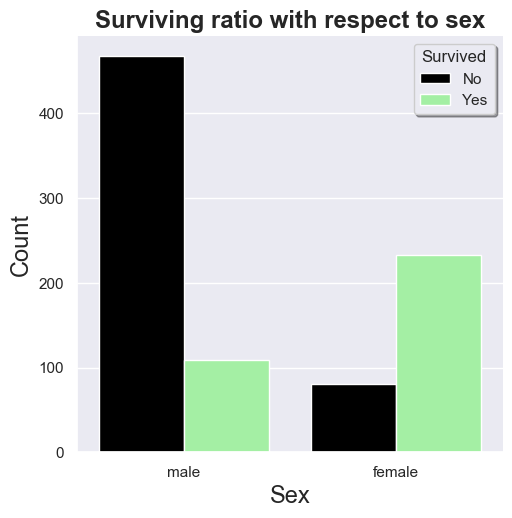

In [33]:
# creating a plot
plt.rcdefaults()
plt.figure(figsize=(18,9), dpi=140)
sns.set_context('paper')
sns.set(style='darkgrid')
sns.catplot(x='Sex', hue='Survived', kind='count', ci=None, palette=["black", "palegreen"], legend_out=False, data=df_train)
plt.legend(title='Survived', labels=['No', 'Yes'], frameon=True, shadow=True)
plt.title('Surviving ratio with respect to sex', fontweight='bold', fontsize='x-large')
plt.ylabel("Count", fontsize=17)
plt.xlabel("Sex", fontsize=17)
plt.show()

It is quite clear that gender was a very significant indicator of survival rate. As we have assumed, females were much more likely to survive.

In [34]:
# showing relation between Age and Survived variables
df_train.groupby(['Age', 'Survived']).Survived.count()

Age    Survived
0.42   1           1
0.67   1           1
0.75   1           2
0.83   1           2
0.92   1           1
                  ..
70.00  0           2
70.50  0           1
71.00  0           2
74.00  0           1
80.00  1           1
Name: Survived, Length: 144, dtype: int64

Value counts for Age with respect to Survived is not very helpful, let's plot it.

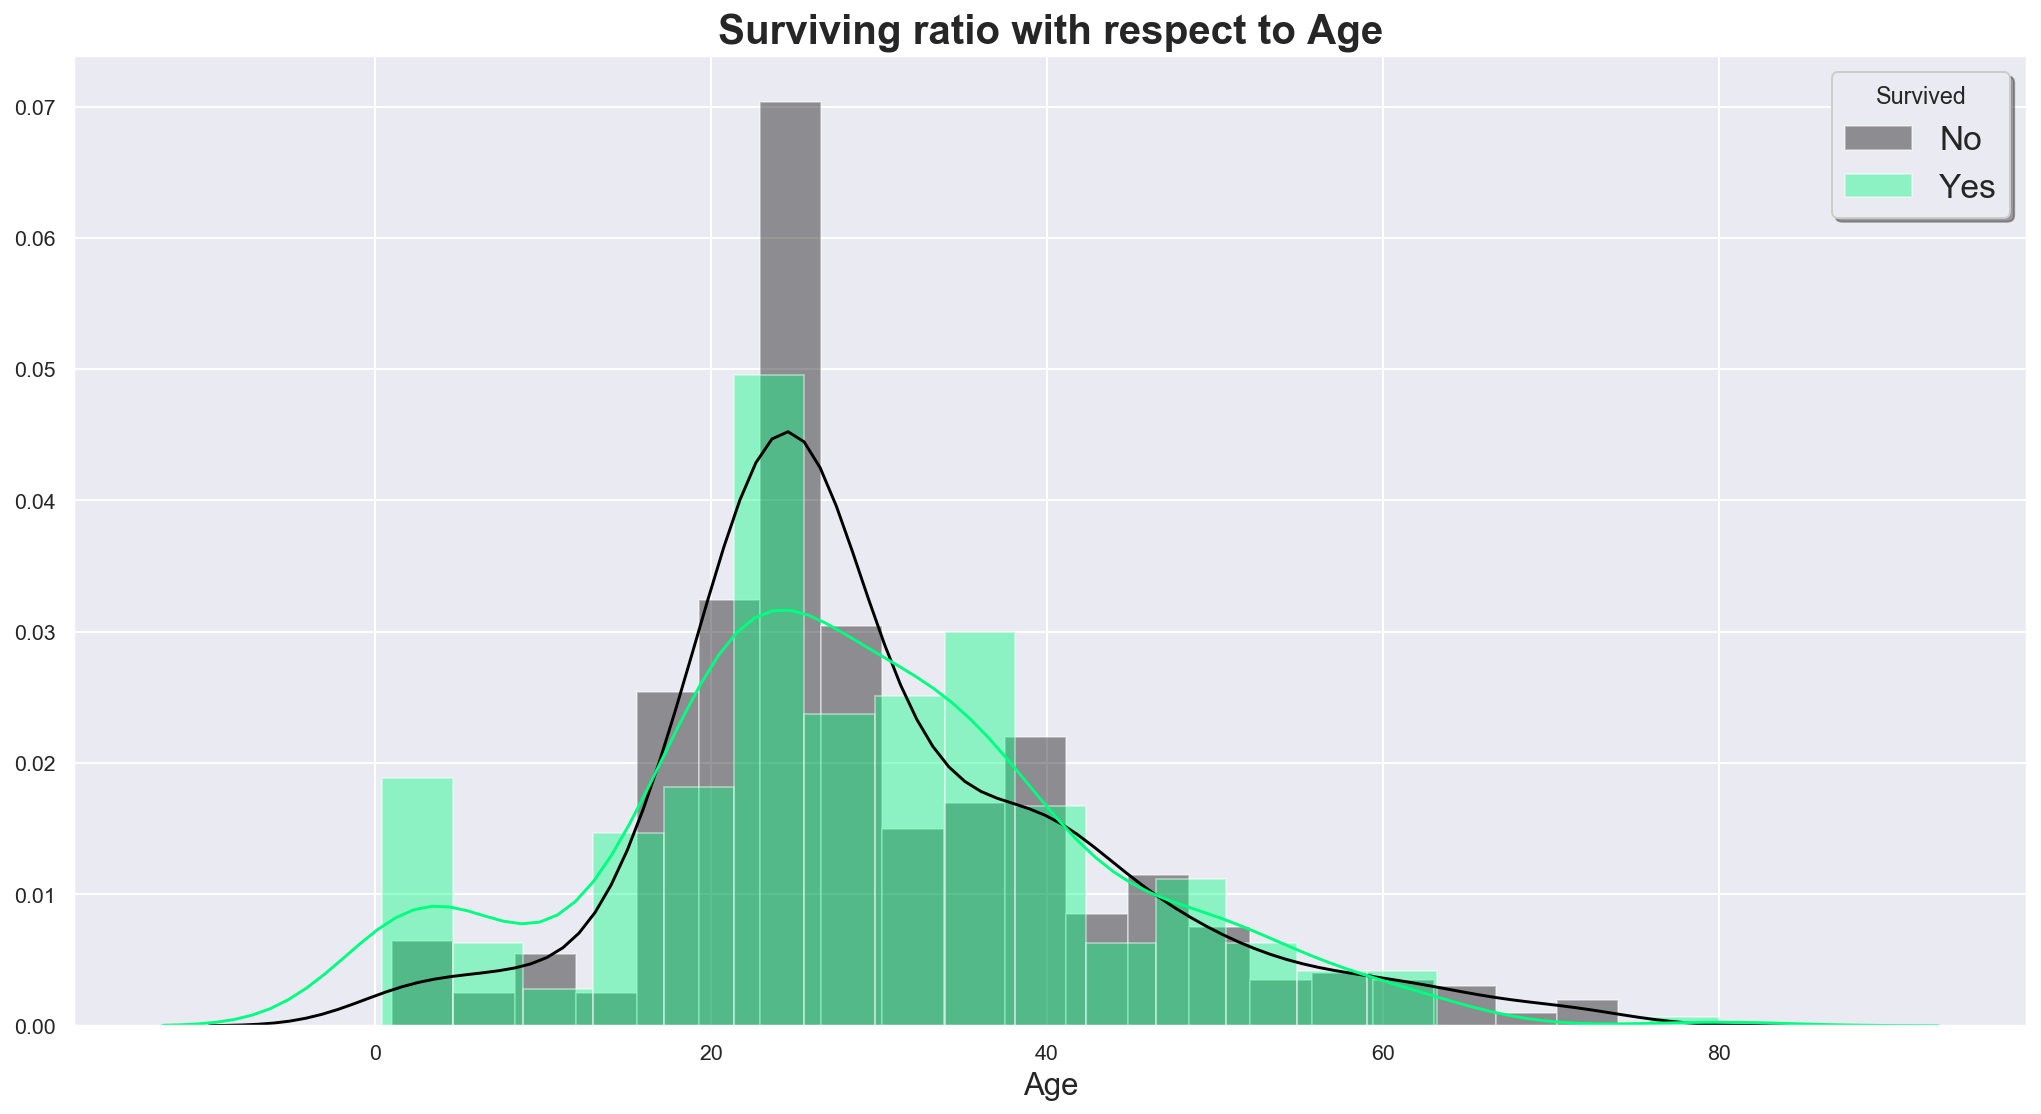

In [35]:
# creating a plot
plt.rcdefaults()
plt.figure(figsize=(18,9), dpi=140)
sns.set_context('notebook')
sns.set(style='darkgrid')
sns.distplot(df_train[df_train['Survived'] == 0]['Age'], label='Not Survived', kde=True, norm_hist=True, color="black")
sns.distplot(df_train[df_train['Survived'] == 1]['Age'], label='Survived', kde=True, norm_hist=True, color="springgreen")
plt.legend(title='Survived', labels=['No', 'Yes'], frameon=True, shadow=True, fontsize='x-large')
plt.title('Surviving ratio with respect to Age', fontweight='bold', fontsize='xx-large')
plt.ylabel("", fontsize=16)
plt.xlabel("Age", fontsize=16)
plt.show()

This is quite interesting, it looks like the biggest gap lands between 20-30 years of age, where there are way more passengers that did not survive, compared to those who survived.

In [36]:
# showing Pclass value counts
df_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [37]:
# Creating gender/pclass variables for plotting purpose
female_third_class = (df_train['Sex'] == 'female') & (df_train['Pclass'] == 3)
female_second_class = (df_train['Sex'] == 'female') & (df_train['Pclass'] == 2)
female_first_class = (df_train['Sex'] == 'female') & (df_train['Pclass'] == 1)

male_third_class = (df_train['Sex'] == 'male') & (df_train['Pclass'] == 3)
male_second_class = (df_train['Sex'] == 'male') & (df_train['Pclass'] == 2)
male_first_class = (df_train['Sex'] == 'male') & (df_train['Pclass'] == 1)

female_3 = df_train.loc[female_third_class, 'Survived'].value_counts()
female_2 = df_train.loc[female_second_class, 'Survived'].value_counts()
female_1 = df_train.loc[female_first_class, 'Survived'].value_counts()

male_3 = df_train.loc[male_third_class, 'Survived'].value_counts()
male_2 = df_train.loc[male_second_class, 'Survived'].value_counts()
male_1 = df_train.loc[male_first_class, 'Survived'].value_counts()

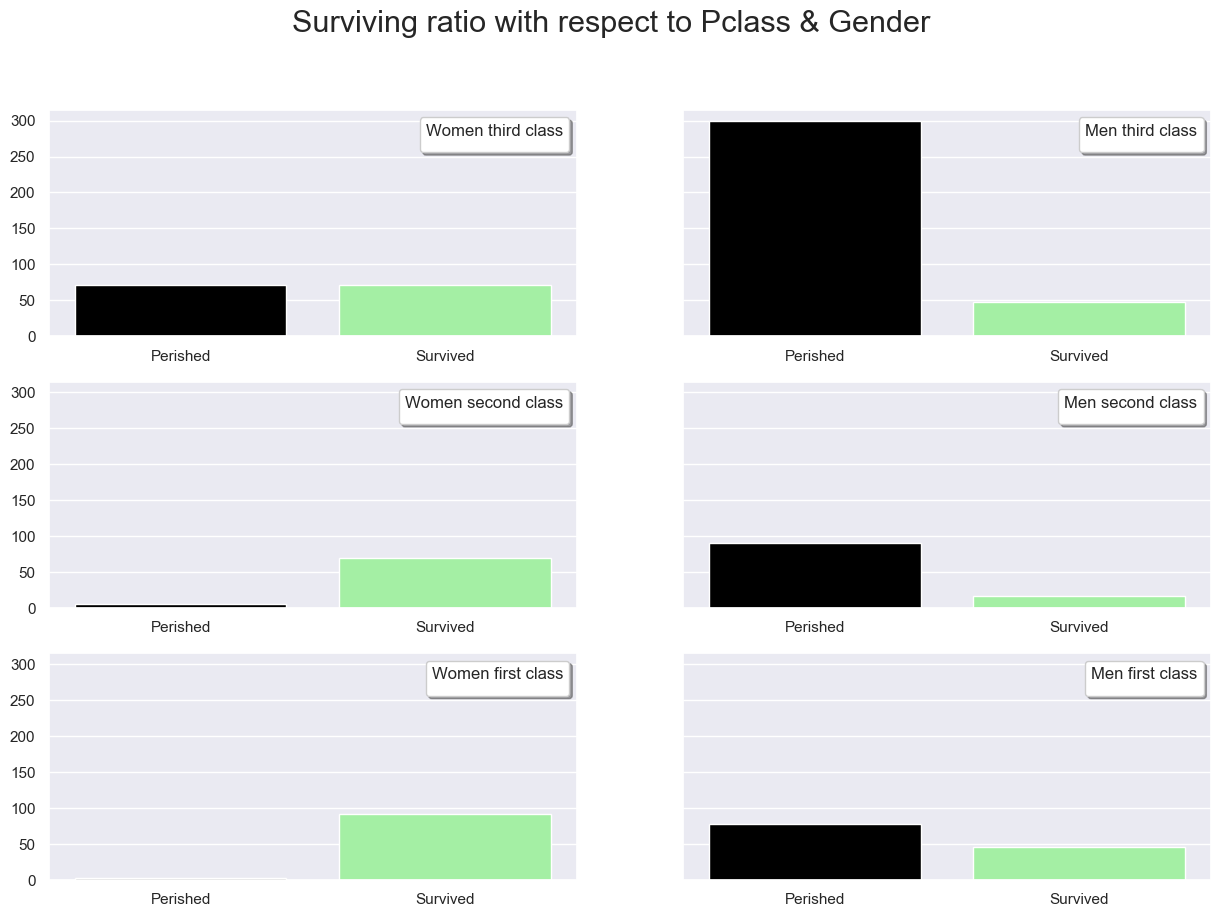

In [38]:
# creating series of plots
plt.rcdefaults()
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 10
sns.set_context('poster')
sns.set(style='darkgrid')

fig, axs = plt.subplots(3, 2, sharey=True)
fig.suptitle("Surviving ratio with respect to Pclass & Gender", fontsize=22)

ax1 = sns.barplot(female_3.index, female_3.values, palette=["black", "palegreen"], ax=axs[0, 0])
ax1.set_xticklabels(["Perished", "Survived"])
h,l = ax1.get_legend_handles_labels()
ax1.legend(handles=h, title="Women third class", frameon=True, shadow=True, facecolor='white')

ax2 = sns.barplot(male_3.index, male_3.values, palette=["black", "palegreen"], ax=axs[0, 1])
ax2.set_xticklabels(["Perished", "Survived"])
ax2.legend(handles=h, title="Men third class", frameon=True, shadow=True, facecolor='white')

ax3 = sns.barplot(female_2.index, female_2.values, palette=["black", "palegreen"], ax=axs[1, 0])
ax3.set_xticklabels(["Perished", "Survived"])
ax3.legend(handles=h, title="Women second class", frameon=True, shadow=True, facecolor='white')

ax4 = sns.barplot(male_2.index, male_2.values, palette=["black", "palegreen"], ax=axs[1, 1])
ax4.set_xticklabels(["Perished", "Survived"])
ax4.legend(handles=h, title="Men second class", frameon=True, shadow=True, facecolor='white')

ax5 = sns.barplot(female_1.index, female_1.values, palette=["black", "palegreen"], ax=axs[2, 0])
ax5.set_xticklabels(["Perished", "Survived"])
ax5.legend(handles=h, title="Women first class", frameon=True, shadow=True, facecolor='white')

ax6 = sns.barplot(male_1.index, male_1.values, palette=["black", "palegreen"], ax=axs[2, 1])
ax6.set_xticklabels(["Perished", "Survived"])
ax6.legend(handles=h, title="Men first class", frameon=True, shadow=True, facecolor='white')

Now it is quite clear that females in the first and second classes were much more likely to survive. Males who were traveling in first-class were also more likely to survive than other men, although the gender feature is dominant with regards to survival ratio.

In [39]:
# checking how many values for each Fare we do have in dataset
df_train['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

Value counts for Fare isn't very helpful either, let's plot it.

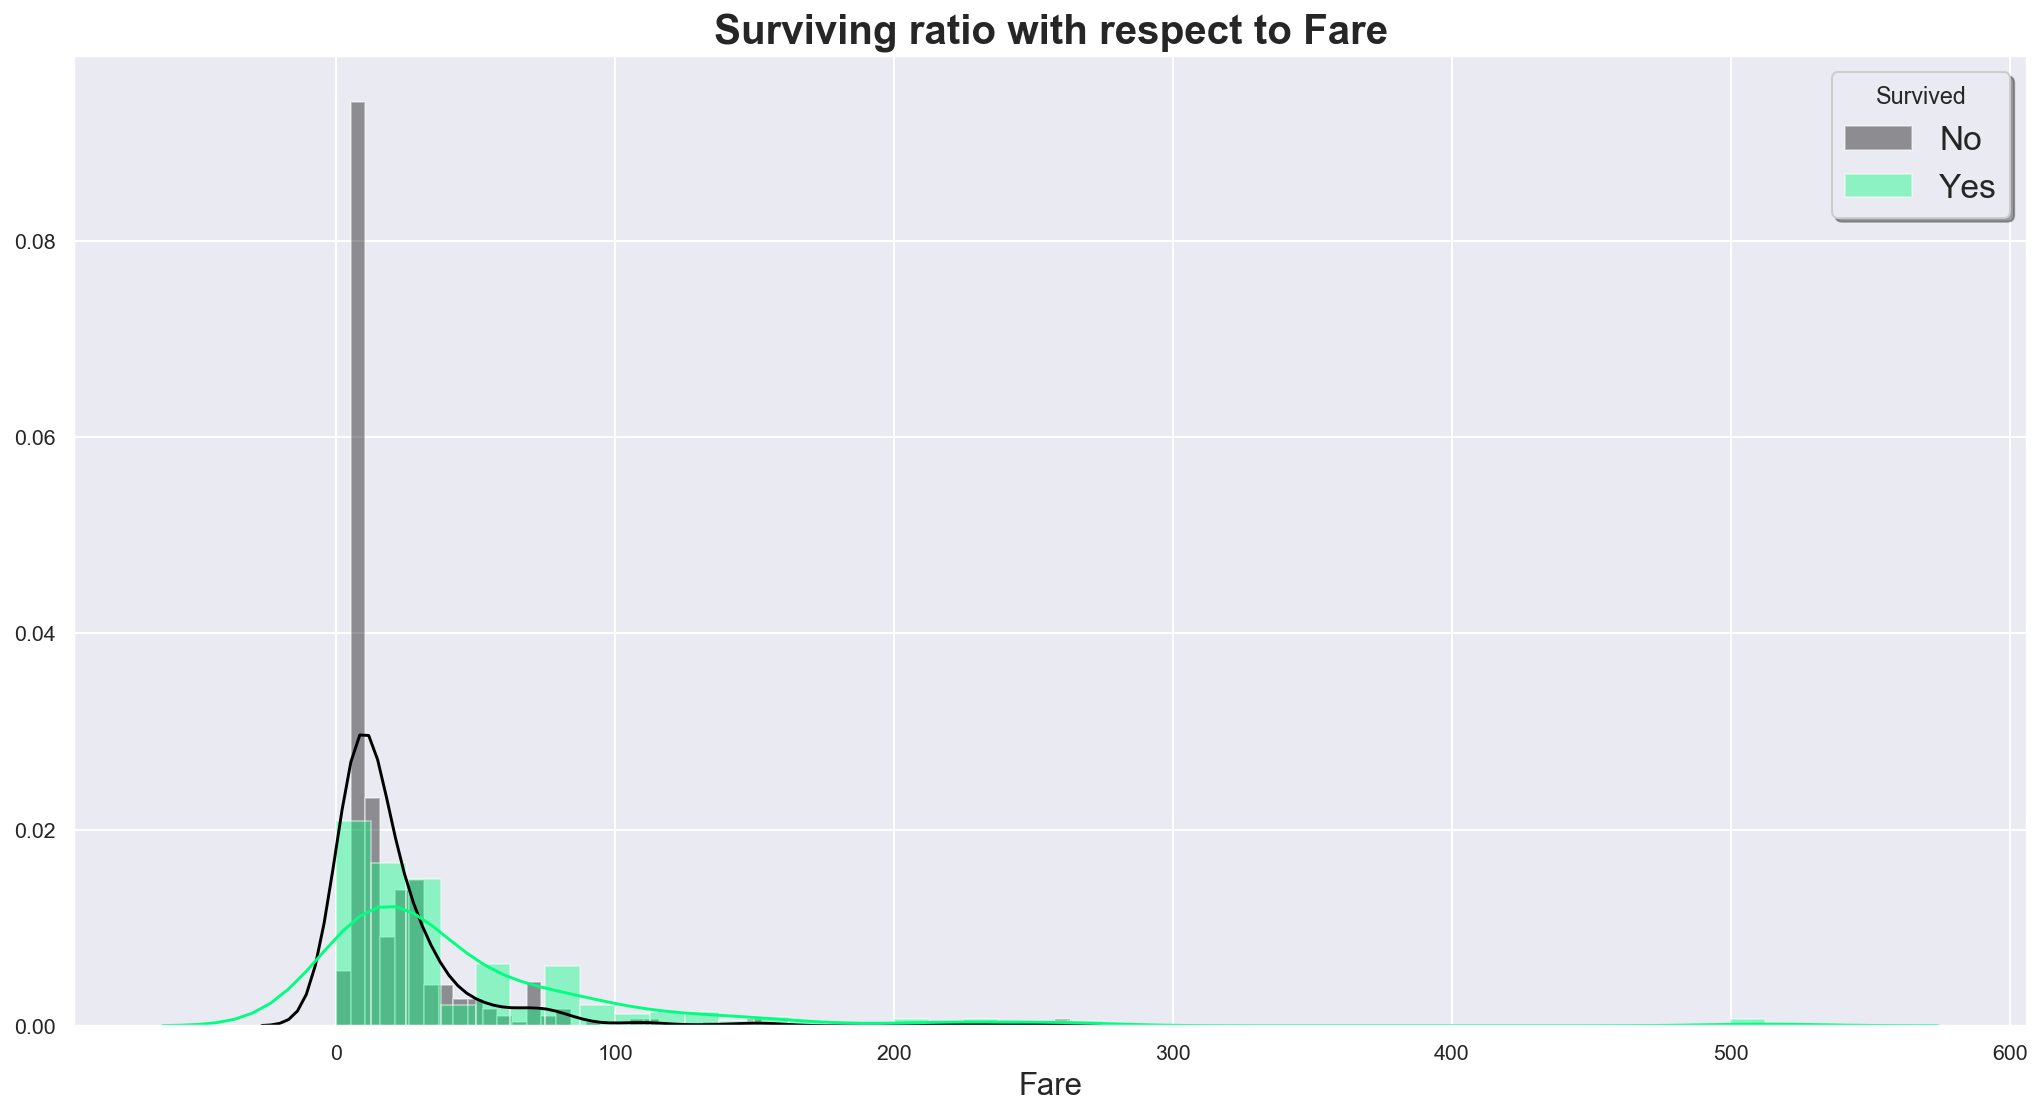

In [40]:
# creating a plot
plt.rcdefaults()
plt.figure(figsize=(18,9), dpi=140)
sns.set_context('notebook')
sns.set(style='darkgrid')
sns.distplot(df_train[df_train['Survived'] == 0]['Fare'], label='Not Survived', kde=True, norm_hist=True, color="black")
sns.distplot(df_train[df_train['Survived'] == 1]['Fare'], label='Survived', kde=True, norm_hist=True, color="springgreen")
plt.legend(title='Survived', labels=['No', 'Yes'], frameon=True, shadow=True, fontsize='x-large')
plt.title('Surviving ratio with respect to Fare', fontweight='bold', fontsize='xx-large')
plt.ylabel("", fontsize=16)
plt.xlabel("Fare", fontsize=16)
plt.show()

Fare plot isn't that helpful, although passengers with higher Fare tend to survive more often than with the low Fare. It seems that few outliers are stretching distribution leaving a long tail on the right. Let's take a closer look at a different angle.

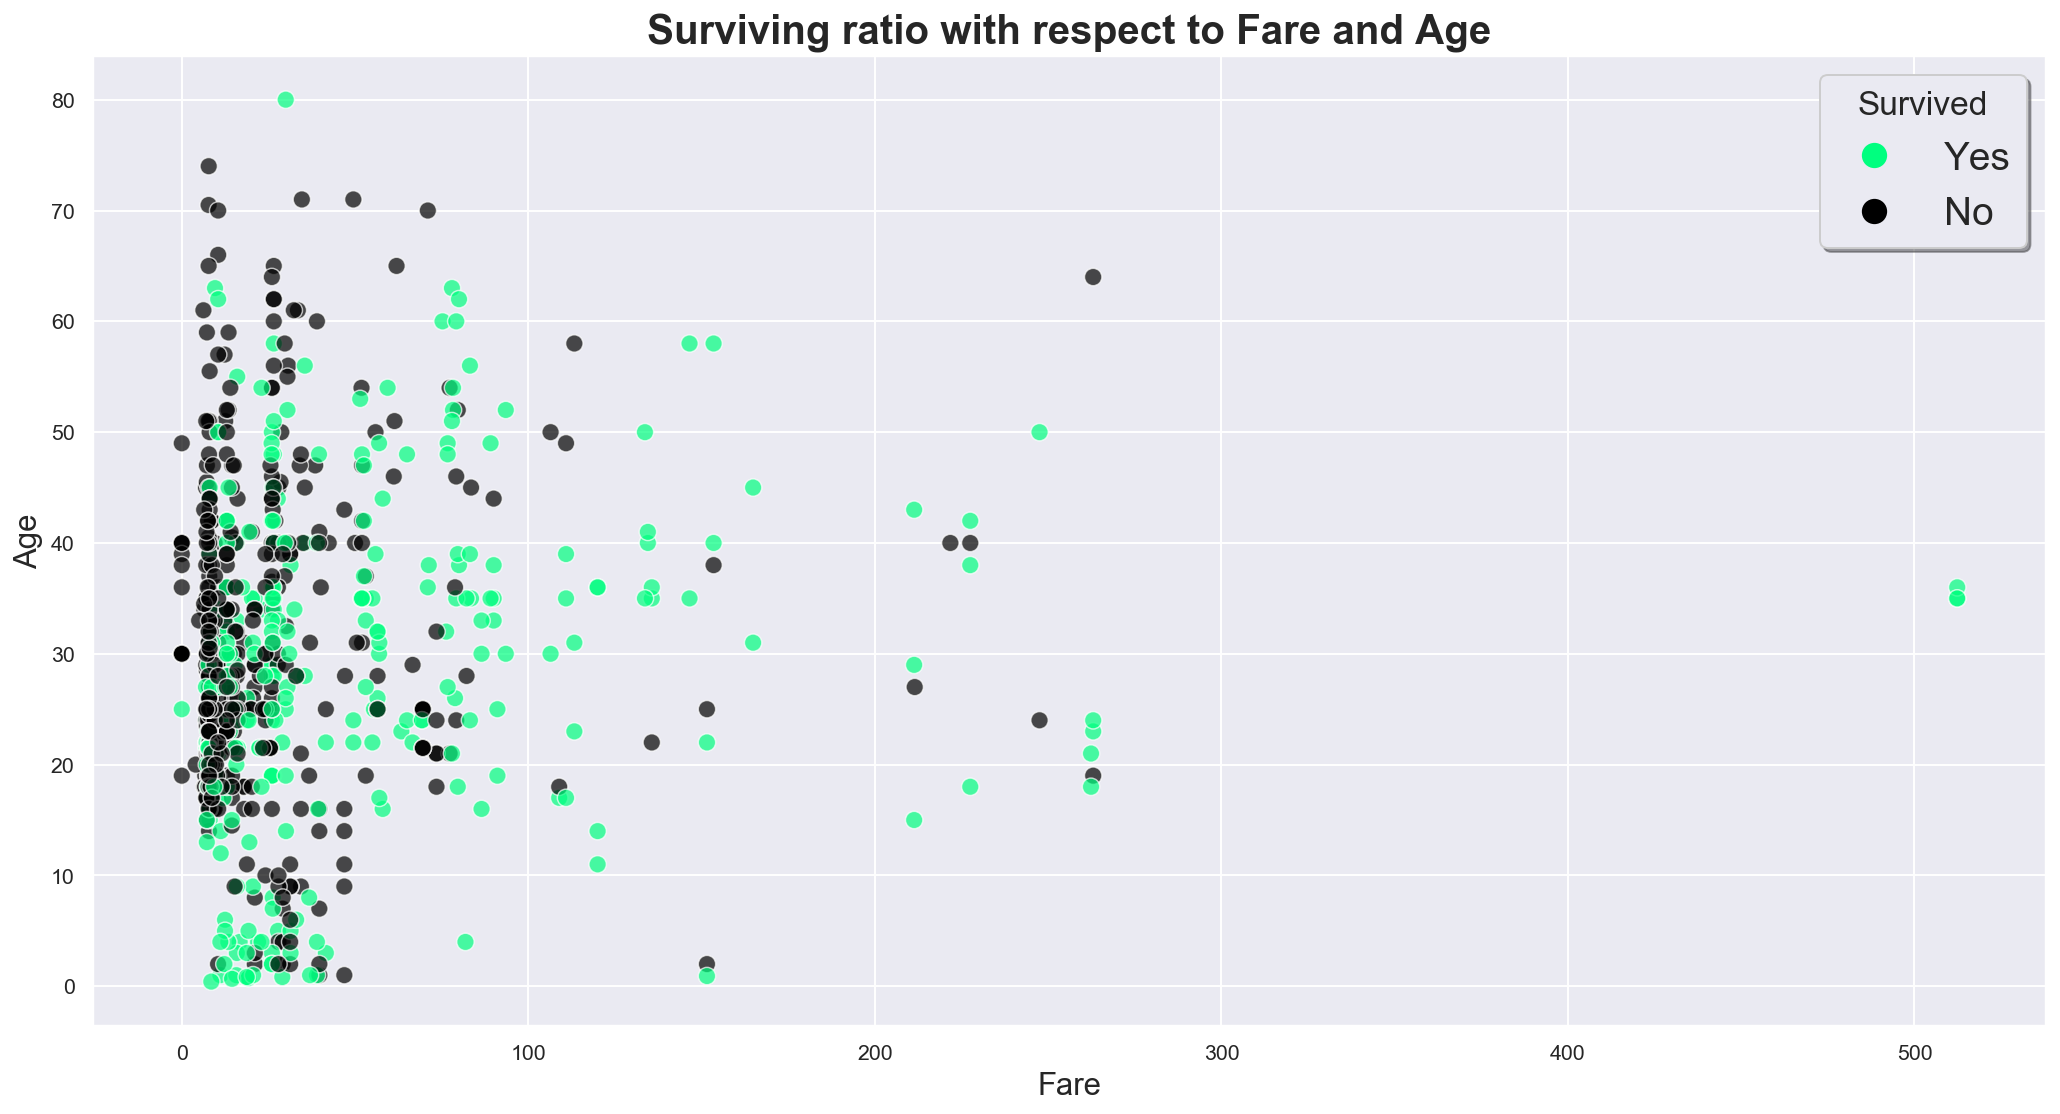

In [41]:
# creating a scatterplot
from matplotlib.lines import Line2D

plt.rcdefaults()
plt.figure(figsize=(18,9), dpi=140)
sns.set_context('notebook')
sns.set(style='darkgrid')
sns.scatterplot(x="Fare", y='Age', hue='Survived', palette=['black', 'springgreen'], legend=False, 
                data=df_train, s=80, alpha=0.7)
custom = [Line2D([], [], marker='.', color='springgreen', linestyle='None', markersize=24),
          Line2D([], [], marker='.', color='black', linestyle='None', markersize=24)]
legend = plt.legend(custom, ['Yes', 'No'], title='Survived', frameon=True, shadow=True, prop={'size': 20})
plt.setp(legend.get_title(), fontsize='x-large')
plt.title('Surviving ratio with respect to Fare and Age', fontweight='bold', fontsize='xx-large')
plt.ylabel("Age", fontsize=16)
plt.xlabel("Fare", fontsize=16)
plt.show()

A Scatter plot is way more useful in this case, we can see that there are a lot more passengers that did not survive, in the lower range of fare. Moreover, there are two outliers whose fare was above 500, and they both have survived. 

We can either eliminate the outliers to minimize the noise, that we will input into a learning algorithm, or deal with them by manipulating the data. Binning Fare variable is an option that I am strongly considering, although we will decide on that in the feature engineering part of our project.

In [42]:
# counting values for SibSp feature
df_train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<Figure size 2520x1260 with 0 Axes>

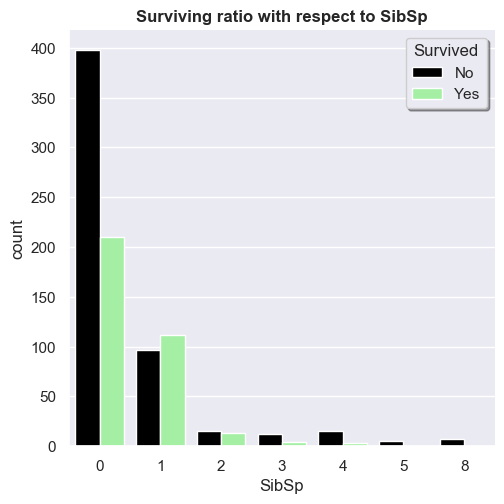

In [43]:
# creating a plot
plt.rcdefaults()
plt.figure(figsize=(18,9), dpi=140)
sns.set_context('paper')
sns.set(style='darkgrid')
sns.catplot(x='SibSp', hue='Survived', kind='count', ci=None, palette=["black", "palegreen"], legend_out=False, data=df_train)
plt.legend(title='Survived', labels=['No', 'Yes'], frameon=True, shadow=True, loc='upper right')
plt.title('Surviving ratio with respect to SibSp', fontweight='bold')
plt.show()

In [44]:
# counting values for Parch feature
df_train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

<Figure size 2520x1260 with 0 Axes>

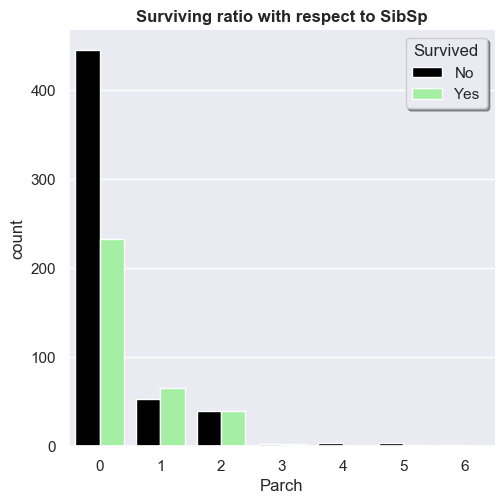

In [45]:
# creating a plot
plt.rcdefaults()
plt.figure(figsize=(18,9), dpi=140)
sns.set_context('paper')
sns.set(style='darkgrid')
sns.catplot(x='Parch', hue='Survived', kind='count', ci=None, palette=["black", "palegreen"], legend_out=False, data=df_train)
plt.legend(title='Survived', labels=['No', 'Yes'], frameon=True, shadow=True, loc='upper right')
plt.title('Surviving ratio with respect to SibSp', fontweight='bold')
plt.show()

It turns out that our initial assumption that passengers who traveled alone were less likely to survive was correct. Besides, there is a positive survival rate for passengers who were traveling with one family member. To some extent having two family members on the board was also predicting better survival outcomes than having none or more than two.

In [46]:
# counting values for Embarked feature
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

<Figure size 2520x1260 with 0 Axes>

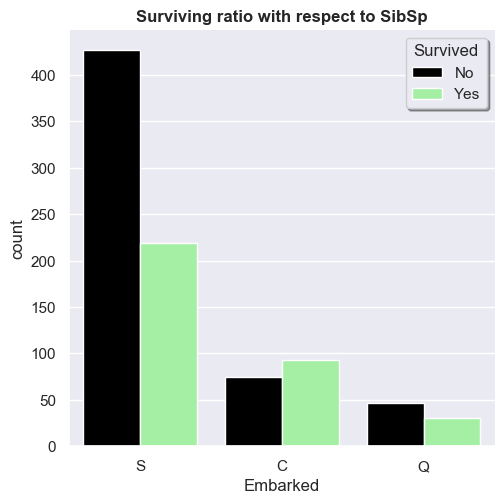

In [47]:
# creating a plot
plt.rcdefaults()
plt.figure(figsize=(18,9), dpi=140)
sns.set_context('paper')
sns.set(style='darkgrid')
sns.catplot(x='Embarked', hue='Survived', kind='count', ci=None, palette=["black", "palegreen"], 
            legend_out=False, data=df_train)
plt.legend(title='Survived', labels=['No', 'Yes'], frameon=True, shadow=True, loc='upper right')
plt.title('Surviving ratio with respect to SibSp', fontweight='bold')
plt.show()

Surprisingly enough, passengers who embarked at Southampton port were more likely to survive than other passengers. Moreover, they were the only group that has a positive survival rate!

## CORRELATION MATRIX

To create a valuable correlation matrix, let's convert the Sex feature into numeric values at this stage, instead of doing that in the feature engineering part of the project.

In [48]:
# function that will convert Sex feature in both datasets into numeric values
def sex_convert_numeric(train, test):
    train['Sex'] = train.Sex.apply(lambda x: 0 if x == 'female' else 1)
    test['Sex'] = test.Sex.apply(lambda x: 0 if x == 'female' else 1)
    return train, test

In [49]:
df_train, df_test = sex_convert_numeric(train=df_train, test=df_test)

In [50]:
# initializing correlation matrix
corr_matrix = df_train.corr()

In [51]:
corr_matrix

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.039033,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.059579,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.413583,0.083081,0.018443,-0.549500
Sex,0.042939,-0.543351,0.131900,1.000000,0.102706,-0.114631,-0.245489,-0.182333
Age,0.039033,-0.059579,-0.413583,0.102706,1.000000,-0.249854,-0.175526,0.122692
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.249854,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.175526,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,-0.182333,0.122692,0.159651,0.216225,1.000000


Text(0.5, 1, 'Correlations Among Features')

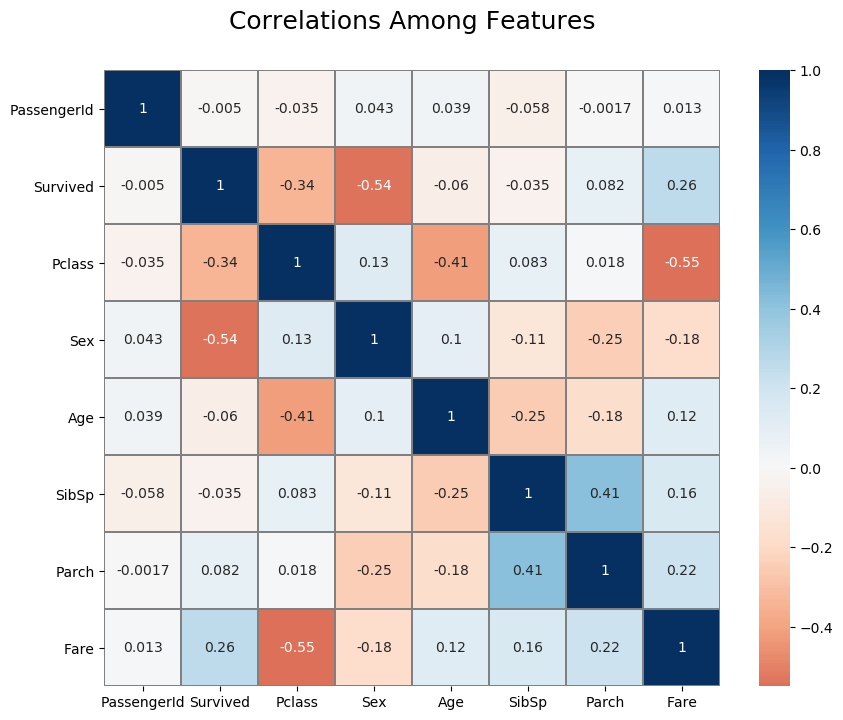

In [52]:
# plotting correlation matrix as a heatmap
plt.rcdefaults()
plt.figure(figsize=(10,8), dpi=100)
sns.heatmap(corr_matrix, cmap='RdBu', linewidths=.9, linecolor='gray', fmt='.2g', center=0, square=True, annot=True)
plt.title("Correlations Among Features", y = 1, fontsize = 18, pad = 30)

Three most relevant correlations with respect to target variable:  
- **Sex** *(-0.54)*    
- **Pclass** *(-0.34)*    
- **Fare** *(0.26)*    

We shouldn't be surprised by the impact of the Sex feature - being female increases the survival probability by a huge margin. Age isn't a good predictor for surviving rate, we can't rule out any relations with age, although there is no clear, linear relationship. There are moderately strong relationships between survival rate and the Pclass feature (negative correlation) as well as with the Fare feature (positive correlation). It is worth noticing that there is also a high correlation between the Pclass and Fare (-0.55). This observation goes hand in hand with logic, since the lower (better, more luxurious) class is, the higher ticket price should be.

# 3. Feature Engineering

Feature engineering is arguably the most important part of the project. Creating new features that will enhance the final model's performance, can be incredibly valuable, as well as, removing redundant features and converting them into values, that model can easily learn from is crucial.

In [53]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,M,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,M,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,M,S


Before we will start processing data for modeling purposes, let's define functions that will allow us to make processing on train set and test set at the same time, since this is way more convenient. We also need a function that will divide data back to the train set and test set.

In [54]:
# function that will allow putting labels/targets values aside
def separate_targets(df):
    targets = df['Survived']
    return targets

In [55]:
targets = separate_targets(df_train)

In [56]:
# function that will merge training and test dataframes into one dataframe
def combine_datasets(train, test):
    indices = len(train)
    df_combined = pd.concat([train, test], sort=True).reset_index(drop=True)
    return df_combined, indices

In [57]:
# function that will recover training and test sets from merged dataframe
def recover_datasets(df, indices):
    train = df.loc[:(indices - 1)].copy()
    test = df.loc[indices:].drop(['Survived'], axis=1).copy()
    return train, test.reset_index(drop=True)

### PassengerId

PassengerId is basically index and it doesn't provide any value in predicting the outcome, thus we will drop this column.

In [58]:
# function that is dropping PassengerId column from both data sets
def drop_passengerid(train, test):
    train.drop(['PassengerId'], axis=1, inplace=True)
    test.drop(['PassengerId'], axis=1, inplace=True)
    return train, test

In [59]:
df_train, df_test = drop_passengerid(df_train, df_test)

### Pclass

As it comes to the Pclass feature, I have noticed that many other competitors created dummy variables. I don't think this is an optimal solution, mainly because it is an ordinal variable, and "distance" should be indeed higher between 1st and 3rd class, than for instance between 1st and 2nd. We will leave this feature as it is.

### Name

In the current form, the Name variable is not very useful since this feature should be distinctive for each passenger. With that being said, dropping it as it is, would be a waste of data. Let's try to derive something impactful from it. We can try by creating a Title variable based on the Name.

In [60]:
# extracting data from Name feature, namely taking first element after the comma and adding it to the python set
def extract_titles(train, test):
    titles = set()
    for name in train['Name']:
        titles.add(name.split(',')[1].split('.')[0].strip())
    for name in test['Name']:
        titles.add(name.split(',')[1].split('.')[0].strip())
    return titles

In [61]:
# extracting set containing all titles in test dataframe and train dataframe
titles = extract_titles(df_train, df_test)

In [62]:
titles

{'Capt',
 'Col',
 'Don',
 'Dona',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir',
 'the Countess'}

In [63]:
# creating a Title feature which will become handy in further exploration 
# (works in the same way we were extracting titles to the set)
def process_titles(train, test):
    train['Title'] = train['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    test['Title'] = test['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    return train, test

In [64]:
df_train, df_test = process_titles(df_train, df_test)

In [65]:
df_train.groupby(['Title', 'Survived']).Survived.count().unstack()

Survived,0,1
Title,,
Capt,1.0,NaN
Col,1.0,1.0
Don,1.0,NaN
Dr,4.0,3.0
Jonkheer,1.0,NaN
Lady,NaN,1.0
Major,1.0,1.0
Master,17.0,23.0
Miss,55.0,127.0


I have done google research to find out the meaning of which title. Based on that and the information we can derive by comparing the number of passengers that survived in each group, let's try to create fewer groups that will help us gain more insight.

In [66]:
titles_dict = {
     'Capt': 'Officer',
     'Col': 'Officer',
     'Don': 'Intelligentsia',
     'Dona': 'Mrs',
     'Dr': 'Intelligentsia',
     'Jonkheer': 'Other',
     'Lady': 'Mrs',
     'Major': 'Officer',
     'Master': 'Other',
     'Miss': 'Miss',
     'Mlle': 'Miss',
     'Mme': 'Mrs',
     'Mr': 'Mr',
     'Mrs': 'Mrs',
     'Ms': 'Mrs',
     'Rev': 'Cleric',
     'Sir': 'Royal',
     'the Countess': 'Royal'
}

In [67]:
# function that will map each title (key in dictionary) to corresponding type (value in dictionary)
def set_titles(train, test):
    train['Title'] = train['Title'].map(titles_dict)
    test['Title'] = test['Title'].map(titles_dict)
    return train, test

In [68]:
df_train, df_test = set_titles(df_train, df_test)

In [69]:
df_train['Title'].value_counts()

Mr                517
Miss              184
Mrs               128
Other              41
Intelligentsia      8
Cleric              6
Officer             5
Royal               2
Name: Title, dtype: int64

In [70]:
df_test['Title'].value_counts()

Mr                240
Miss               78
Mrs                74
Other              21
Cleric              2
Officer             2
Intelligentsia      1
Name: Title, dtype: int64

In [71]:
# Now we can drop Name feature, since we are no longer using it
def drop_name(train, test):
    train.drop(['Name'], axis=1, inplace=True)
    test.drop(['Name'], axis=1, inplace=True)
    return train, test

In [72]:
df_train, df_test = drop_name(df_train, df_test)

### Sex

We already did transform this feature into numeric values before, nothing left to work when it comes to Sex feature.

### Age

We have previously seen that there is no linear relation between Age feature and survival rate, although I have mentioned that we can expect different relation types. Age looks like a too important feature to just leave it as it is. Let's dig deeper and try different bins so that we can hopefully capture the survival rate relation in the process.

In [73]:
df_train['Age'].value_counts()

25.00    117
21.50     42
40.00     34
30.00     34
24.00     30
        ... 
66.00      1
36.50      1
55.50      1
23.50      1
0.42       1
Name: Age, Length: 89, dtype: int64

In [74]:
# function that helps in visualizing bins for different number of bins selected with Age feature
def visualize_bins(df, bins_number):
    df_copy = df.copy()
    try:
        bins = pd.qcut(df_copy['Age'], bins_number)
    except ValueError:
        print('Please pick different number of bins, to avoid duplicated edges')
    else:
        df_copy['Age'] = bins
        
        plt.rcdefaults()
        plt.figure(figsize=(18,9), dpi=140)
        sns.set_context('notebook')
        sns.set(style='darkgrid')
        sns.catplot(x='Age', hue='Survived', kind='count', ci=None, palette=["black", "palegreen"], 
            legend_out=False, height=6, aspect=3, data=df_copy)
        plt.legend(title='Survived', labels=['No', 'Yes'], frameon=True, shadow=True, loc='upper right')
        plt.title('Surviving ratio with respect to Age bins', fontweight='bold', size='x-large')
        plt.show()

<Figure size 2520x1260 with 0 Axes>

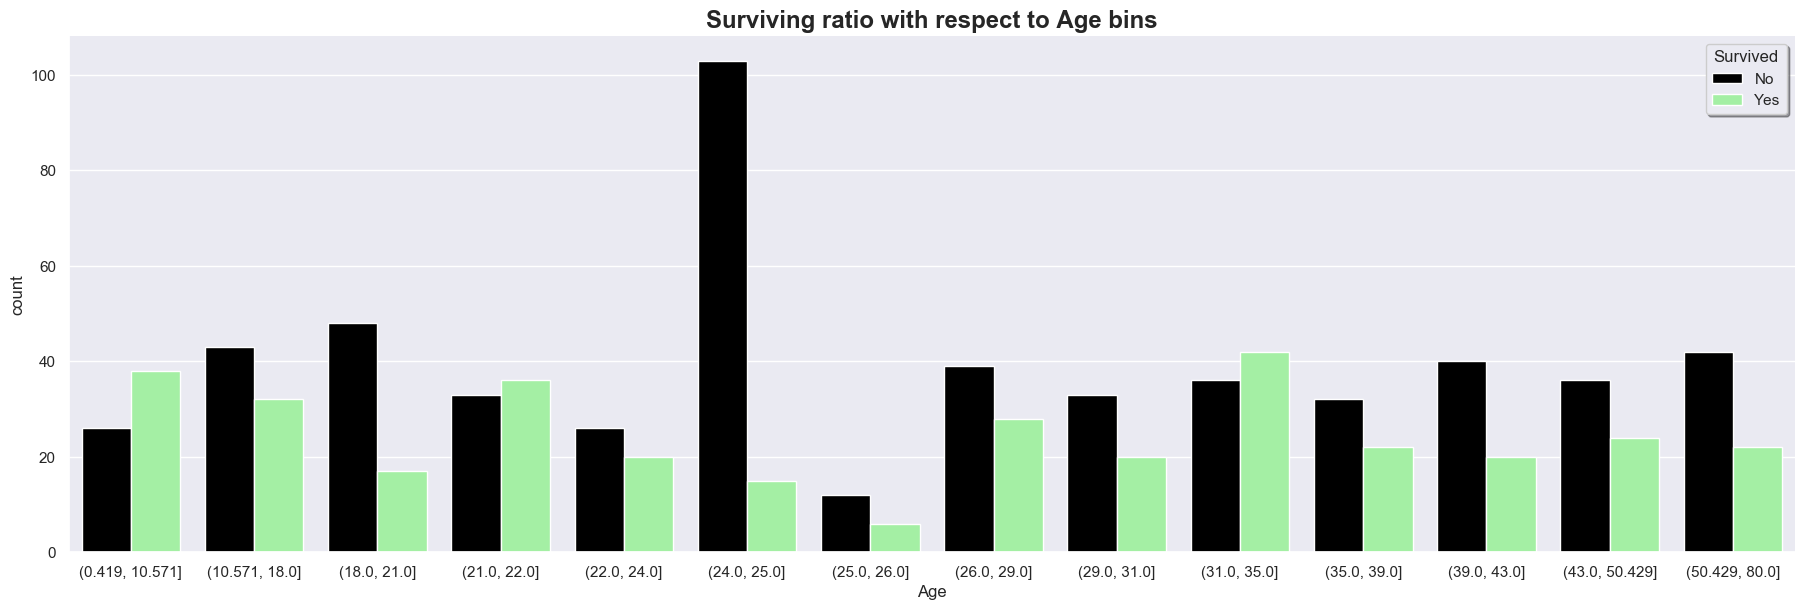

In [75]:
visualize_bins(df_train, 14)

<Figure size 2520x1260 with 0 Axes>

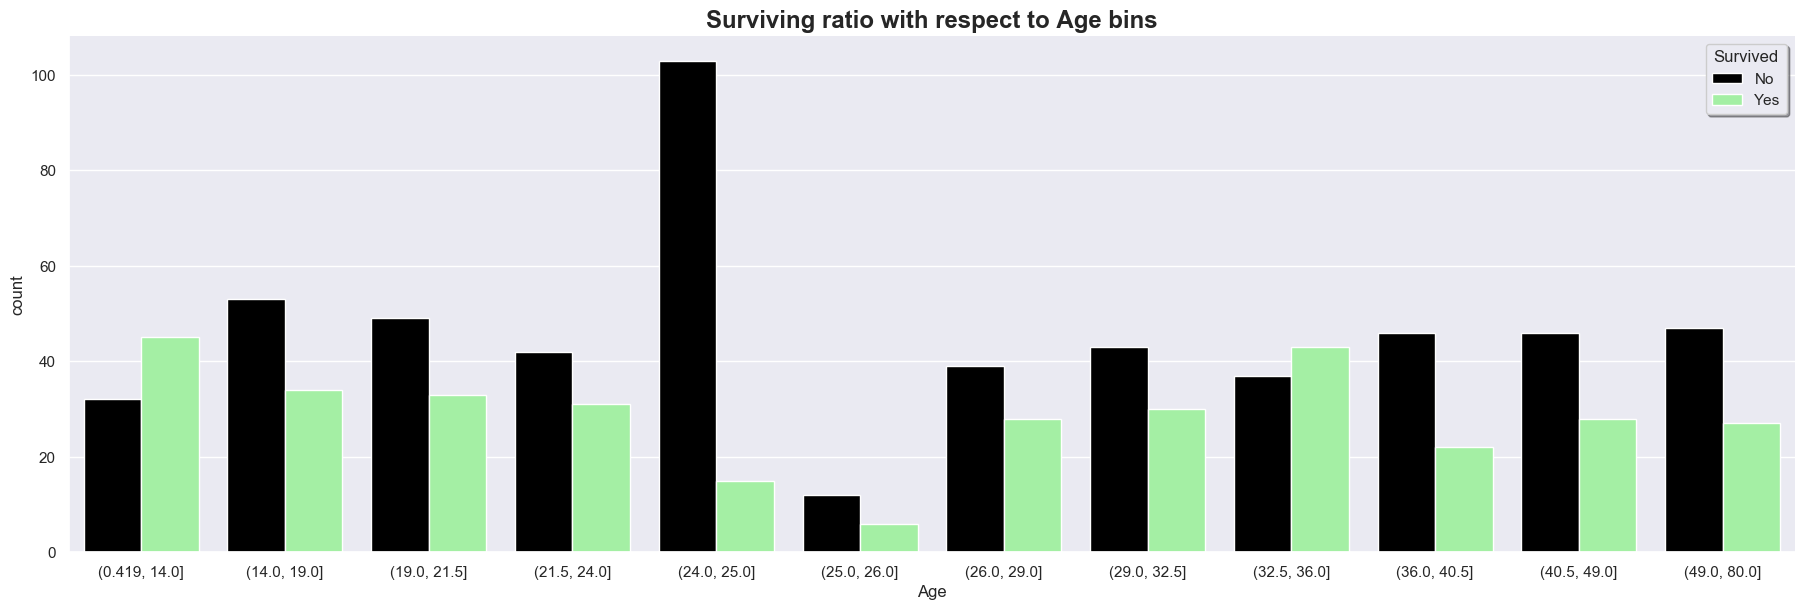

In [76]:
visualize_bins(df_train, 12)

<Figure size 2520x1260 with 0 Axes>

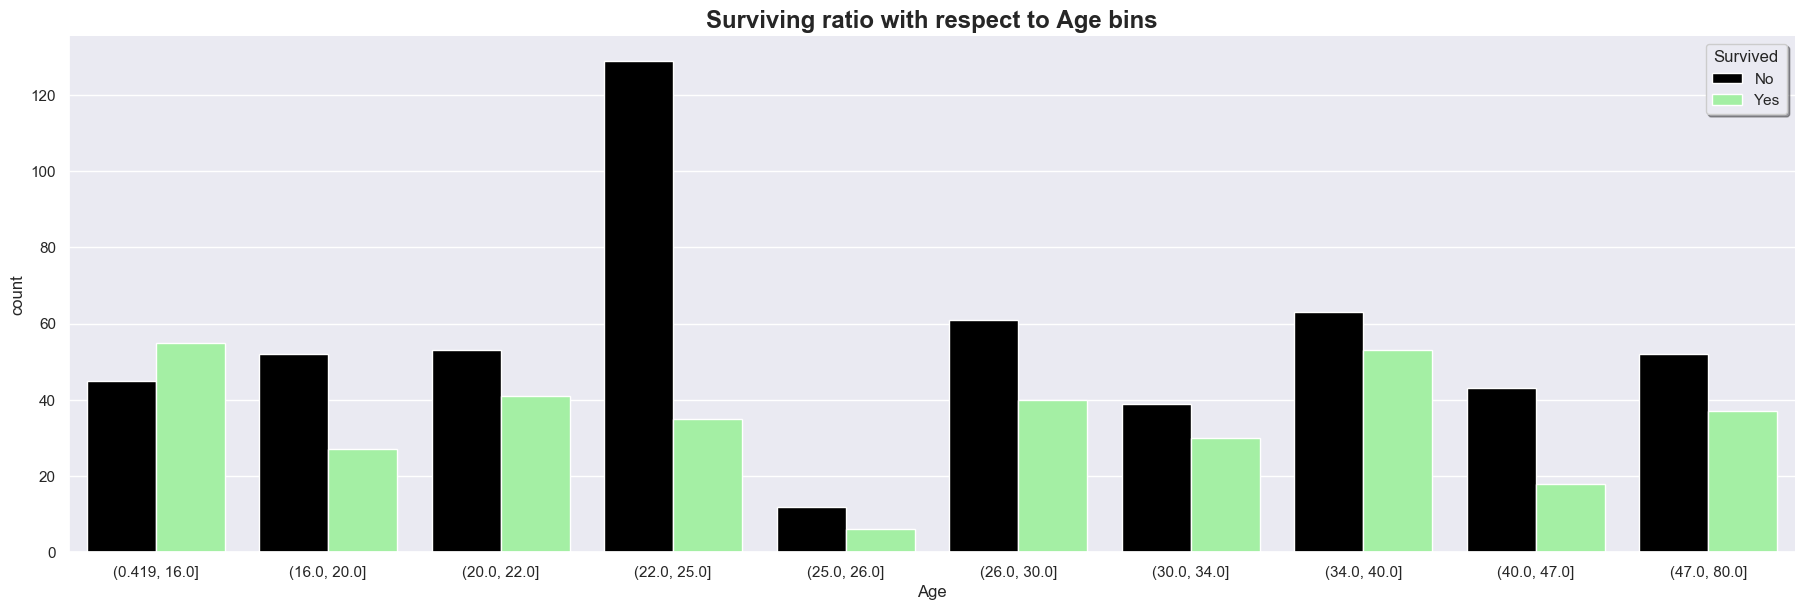

In [77]:
visualize_bins(df_train, 10)

<Figure size 2520x1260 with 0 Axes>

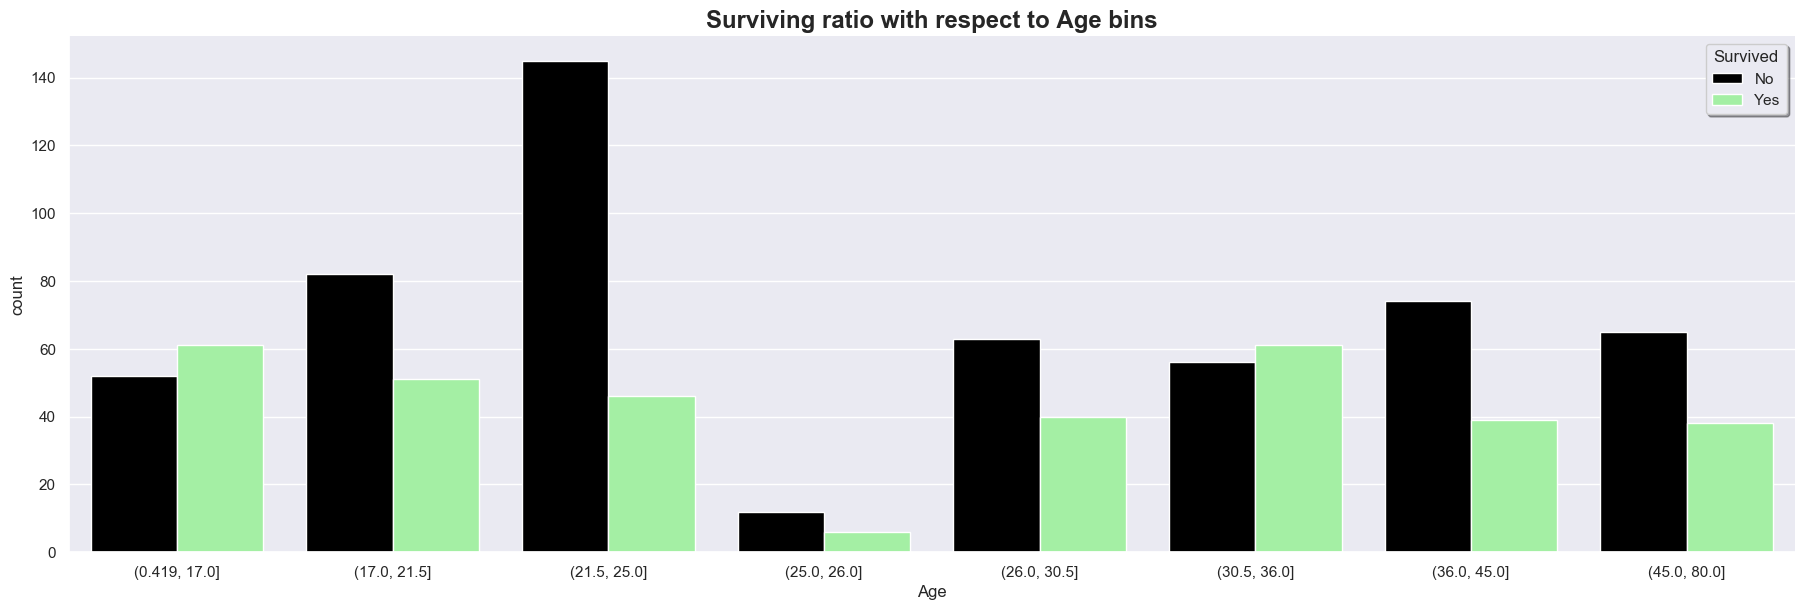

In [78]:
visualize_bins(df_train, 8)

<Figure size 2520x1260 with 0 Axes>

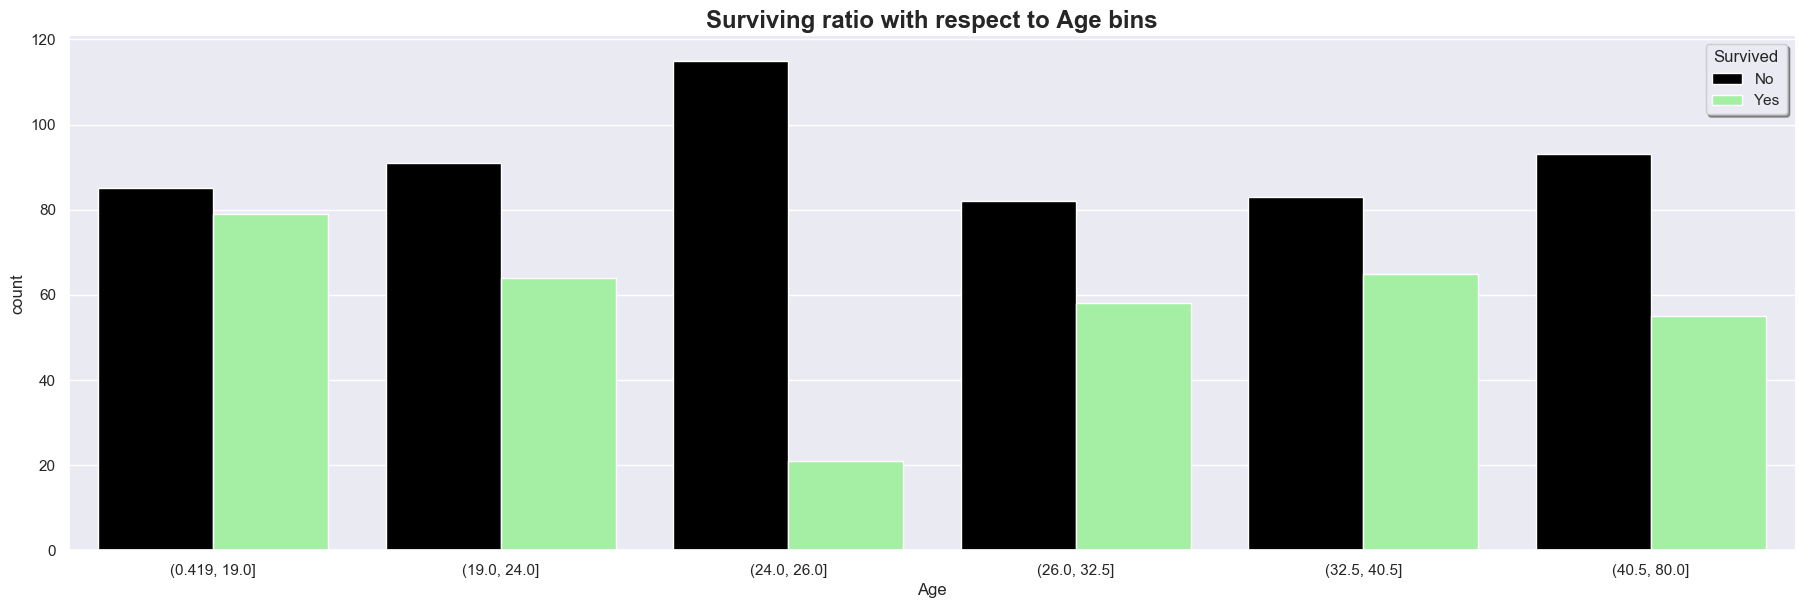

In [79]:
visualize_bins(df_train, 6)

After visual inspection I have decided to pick 8 bins due to interesting dynamic in range of 30,5-36

In [80]:
# function that converts Age feature to selected number of bins
def set_bins(df, bins_number):
    df['Age'] = pd.qcut(df['Age'], bins_number)
    return df

In [81]:
# we combine both datasets together because we want to have same bins range in both datasets
df_combined, indices = combine_datasets(df_train, df_test)

In [82]:
df_combined = set_bins(df_combined, 8)

In [83]:
# we can now recover both datasets for further processing
df_train, df_test = recover_datasets(df_combined, indices)

### SibSp & Parch

I think it is a good idea to capture the size of the family, that passengers were traveling with. The SibSp and Parch features are both helping us to understand how many relatives a passenger had on the Titanic. We have seen that traveling alone harmed surviving chances for passengers in explanatory data analysis. It feels natural to come up with one feature that can capture this relation.

In [84]:
# function that creates Family Size feature in both datasets
def set_family_size(train, test):
    train['Family Size'] = train.SibSp + train.Parch + 1
    test['Family Size'] = test.SibSp + test.Parch + 1
    return train, test

In [85]:
df_train, df_test = set_family_size(df_train, df_test)

In [86]:
df_train.head()

,Age,Cabin,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,Family Size
0,"(21.5, 24.0]",M,S,7.2500,0,3,1,1,0.0,A/5 21171,Mr,2
1,"(36.0, 45.0]",C,C,71.2833,0,1,0,1,1.0,PC 17599,Mrs,2
2,"(24.0, 26.0]",M,S,7.9250,0,3,0,0,1.0,STON/O2. 3101282,Miss,1
3,"(30.0, 36.0]",C,S,53.1000,0,1,0,1,1.0,113803,Mrs,2
4,"(30.0, 36.0]",M,S,8.0500,0,3,1,0,0.0,373450,Mr,1


In [87]:
df_train['Family Size'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family Size, dtype: int64

<Figure size 2520x1260 with 0 Axes>

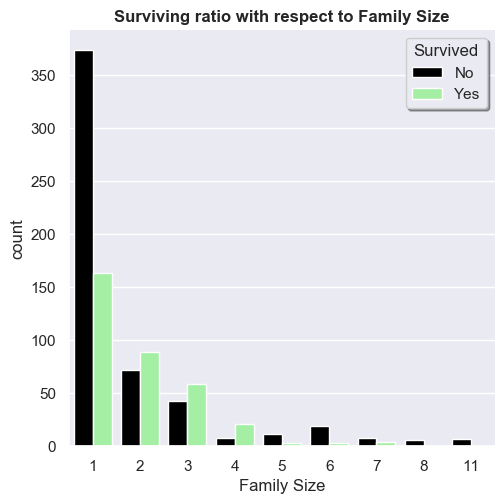

In [88]:
# creating a plot
plt.rcdefaults()
plt.figure(figsize=(18,9), dpi=140)
sns.set_context('paper')
sns.set(style='darkgrid')
sns.catplot(x='Family Size', hue='Survived', kind='count', ci=None, palette=["black", "palegreen"], 
            legend_out=False, data=df_train)
plt.legend(title='Survived', labels=['No', 'Yes'], frameon=True, shadow=True, loc='upper right')
plt.title('Surviving ratio with respect to Family Size', fontweight='bold')
plt.show()

The plot above indicates that it does make a lot of sense to group the Family Size feature to capture the dynamic of relationship to survival rate. Let's do this.

In [89]:
# helper function that will process each size passed as int to the categorical value
def family_group(size):
    if (size == 1):
        label = 'alone'
    elif (size <= 4):
        label = 'small family'
    else:
        label = 'large family'
    return label

In [90]:
# function that is mapping each numeric value in Family Size feature to the corresponding category
def process_family_size(train, test):
    train['Family Group'] = train['Family Size'].map(family_group)
    test['Family Group'] = test['Family Size'].map(family_group)
    return train, test

In [91]:
df_train, df_test = process_family_size(df_train, df_test)

In [92]:
df_train.head()

,Age,Cabin,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,Family Size,Family Group
0,"(21.5, 24.0]",M,S,7.2500,0,3,1,1,0.0,A/5 21171,Mr,2,small family
1,"(36.0, 45.0]",C,C,71.2833,0,1,0,1,1.0,PC 17599,Mrs,2,small family
2,"(24.0, 26.0]",M,S,7.9250,0,3,0,0,1.0,STON/O2. 3101282,Miss,1,alone
3,"(30.0, 36.0]",C,S,53.1000,0,1,0,1,1.0,113803,Mrs,2,small family
4,"(30.0, 36.0]",M,S,8.0500,0,3,1,0,0.0,373450,Mr,1,alone


### Ticket

Ticket is definitely the tricky one... let's take a close look at value counts

In [93]:
df_train['Ticket'].value_counts()

CA. 2343              7
1601                  7
347082                7
3101295               6
347088                6
                     ..
367655                1
SOTON/O.Q. 3101306    1
113796                1
SC/PARIS 2149         1
14973                 1
Name: Ticket, Length: 681, dtype: int64

Let's drop this feature for now...

In [94]:
# function that is dropping Ticket feature from both datasets
def drop_ticket(train, test):
    train.drop(['Ticket'], axis=1, inplace=True)
    test.drop(['Ticket'], axis=1, inplace=True)
    return train, test

In [95]:
df_train, df_test = drop_ticket(df_train, df_test)

In [96]:
df_train.head()

,Age,Cabin,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,Title,Family Size,Family Group
0,"(21.5, 24.0]",M,S,7.2500,0,3,1,1,0.0,Mr,2,small family
1,"(36.0, 45.0]",C,C,71.2833,0,1,0,1,1.0,Mrs,2,small family
2,"(24.0, 26.0]",M,S,7.9250,0,3,0,0,1.0,Miss,1,alone
3,"(30.0, 36.0]",C,S,53.1000,0,1,0,1,1.0,Mrs,2,small family
4,"(30.0, 36.0]",M,S,8.0500,0,3,1,0,0.0,Mr,1,alone


### Fare

Here are potential options of using Fare feature:   
- leave it as it is and standardize the values before feeding the learning algorithm   
- use a similar approach to Age feature and search for best bins combination that will capture dynamics between the Fare feature and surviving ratio   
- introduce new features based on the Fare value, for instance: the Fare with respect to the Family Size

In [97]:
df_train['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

In [98]:
# function that helps in visualizing bins for different number of bins selected with Fare feature
def visualize_fare_bins(df, bins_number):
    df_copy = df.copy()
    try:
        bins = pd.qcut(df_copy['Fare'], bins_number)
    except ValueError:
        print('Please pick different number of bins, to avoid duplicated edges')
    else:
        df_copy['Fare'] = bins
        
        plt.rcdefaults()
        plt.figure(figsize=(18,9), dpi=140)
        sns.set_context('notebook')
        sns.set(style='darkgrid')
        sns.catplot(x='Fare', hue='Survived', kind='count', ci=None, palette=["black", "palegreen"], 
            legend_out=False, height=6, aspect=3, data=df_copy)
        plt.legend(title='Survived', labels=['No', 'Yes'], frameon=True, shadow=True, loc='upper right')
        plt.title('Surviving ratio with respect to Fare bins', fontweight='bold', size='x-large')
        plt.show()

<Figure size 2520x1260 with 0 Axes>

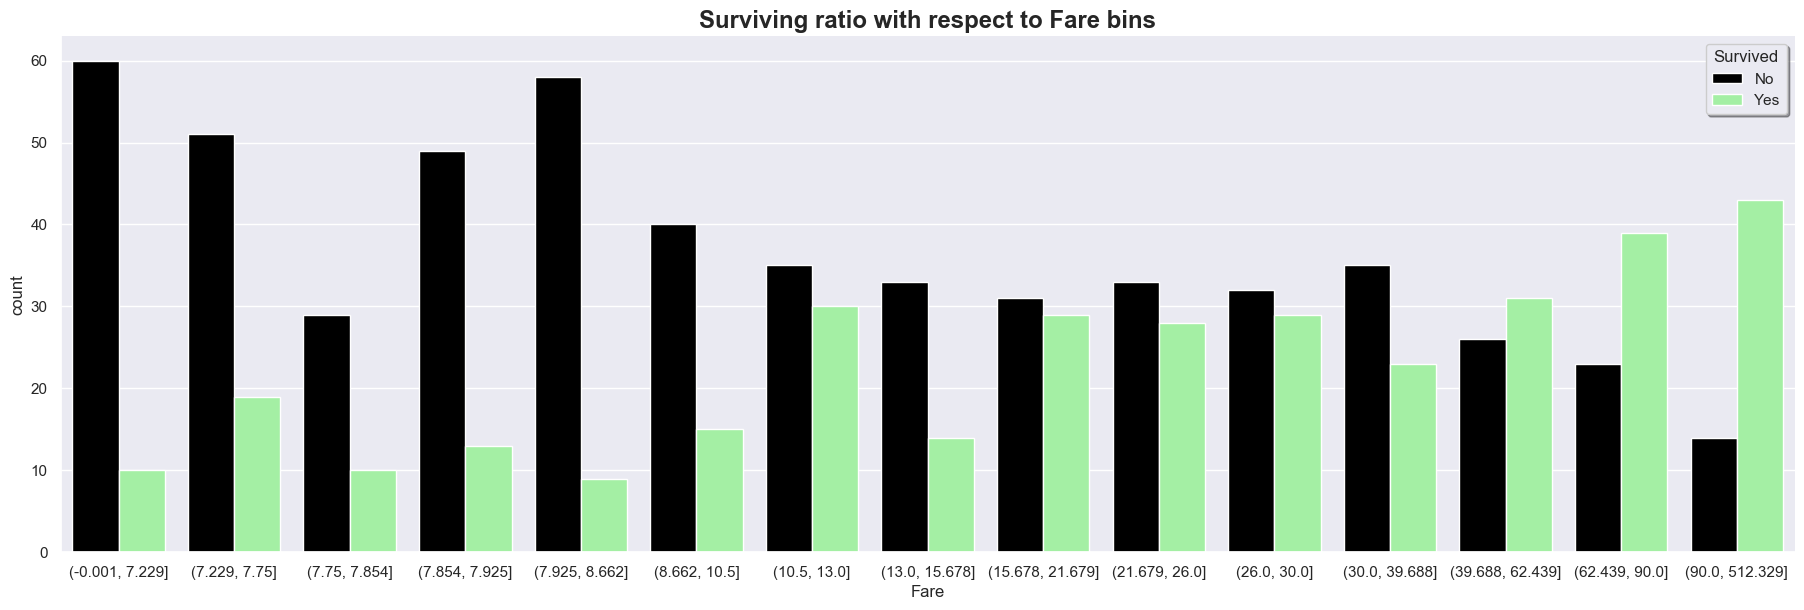

In [99]:
visualize_fare_bins(df_train, 15)

<Figure size 2520x1260 with 0 Axes>

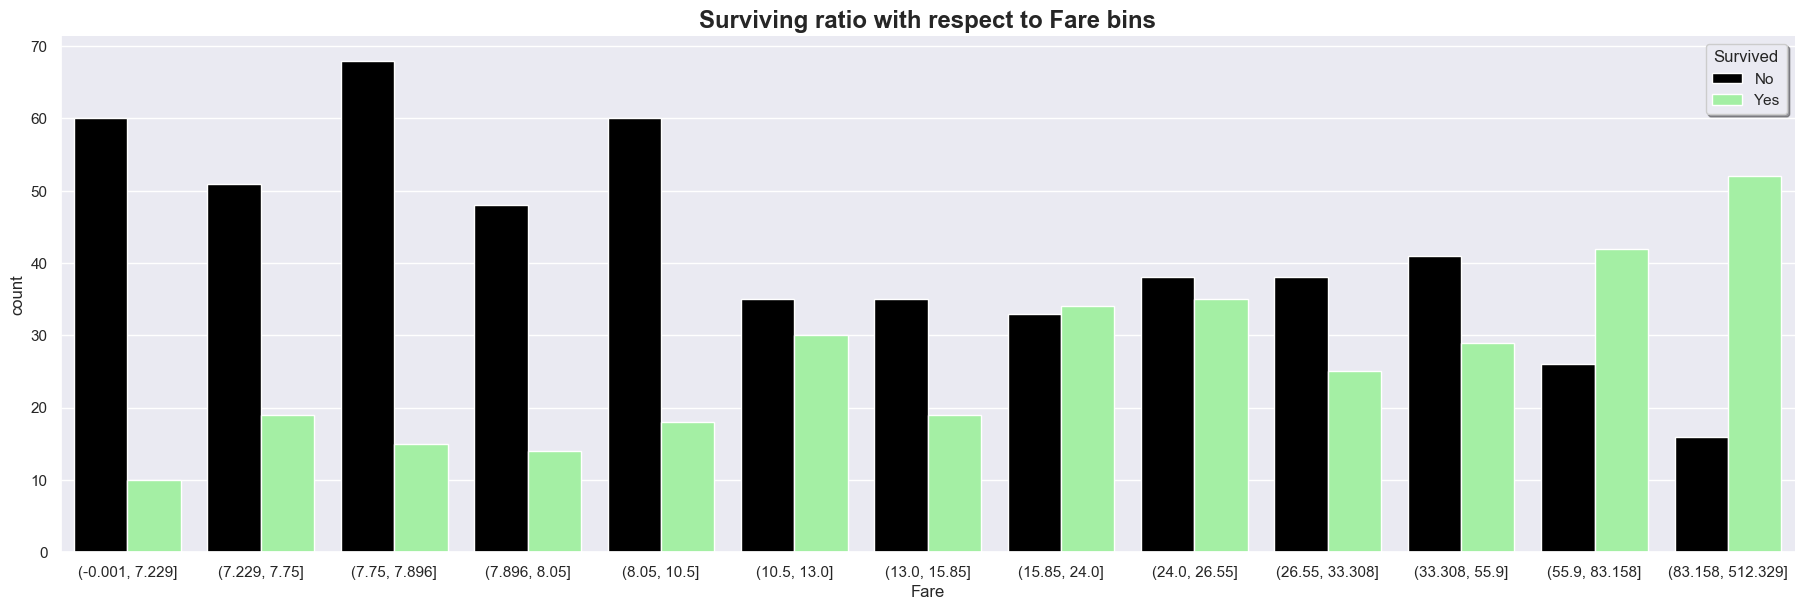

In [100]:
visualize_fare_bins(df_train, 13)

<Figure size 2520x1260 with 0 Axes>

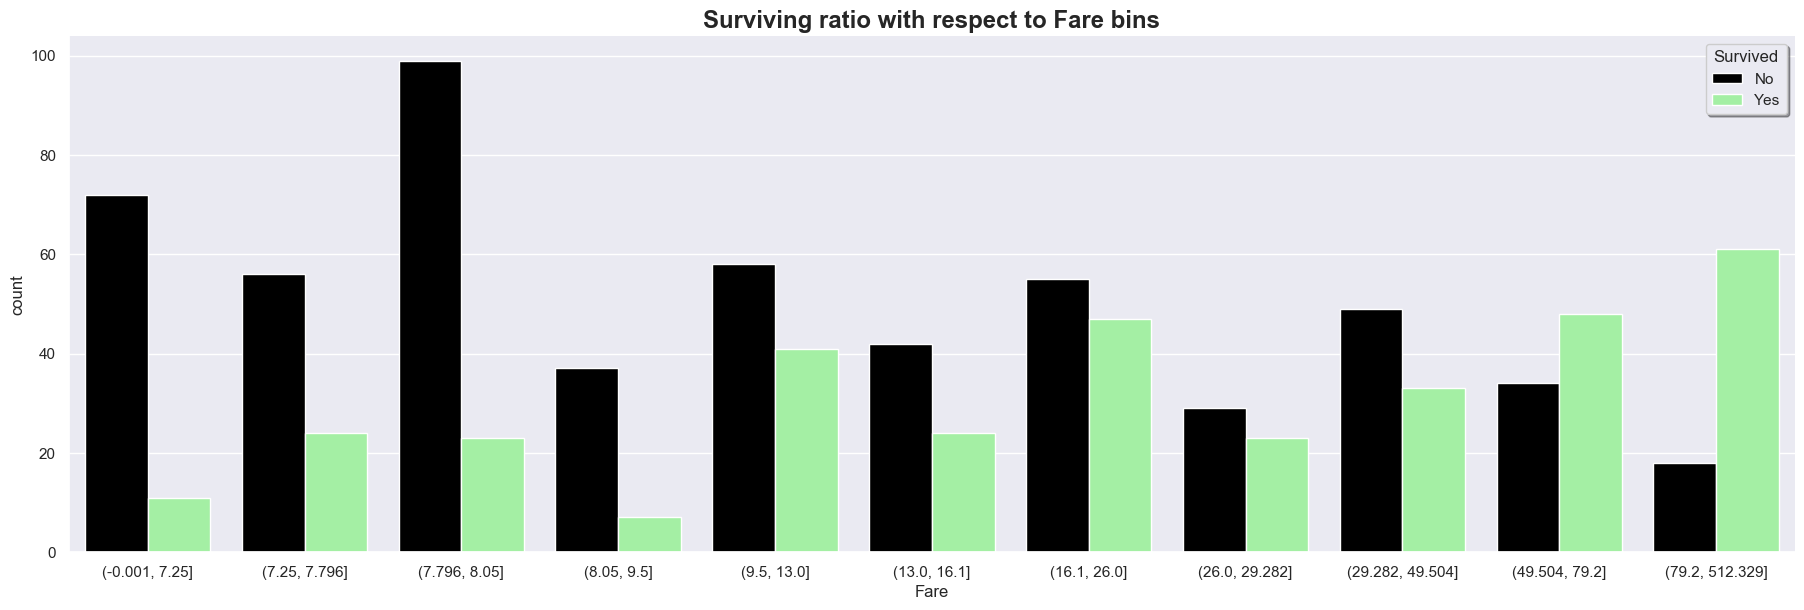

In [101]:
visualize_fare_bins(df_train, 11)

<Figure size 2520x1260 with 0 Axes>

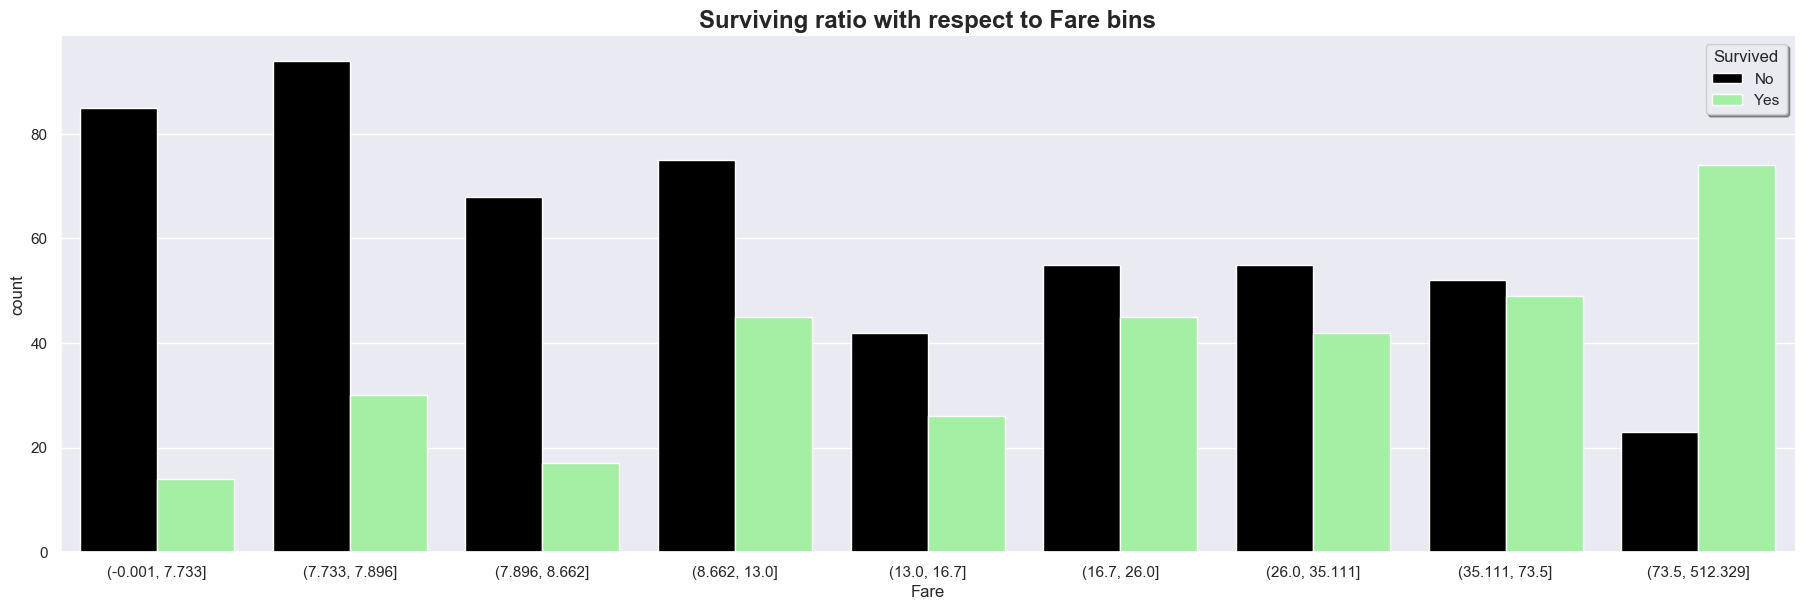

In [102]:
visualize_fare_bins(df_train, 9)

Option with 13 bins looks promising. It captures the relation while also introducing opposite dynamic in range between (15.85-24)

Let's try to introduce new features now and to group the Fare to categories based on common sense

In [103]:
# function that creates new feature - Fare per Member
def set_fare_per_member(train, test):
    train['Fare per Member'] = train['Fare'] / train['Family Size']
    test['Fare per Member'] = test['Fare'] / test['Family Size']
    return train, test

In [104]:
df_train, df_test = set_fare_per_member(df_train, df_test)

In [105]:
# helper function that will process each size passed as int into the categorical value
def fare_group(fare):
    if fare <= 4:
        f = 'very low'
    elif fare <= 9:
        f = 'low'
    elif fare <= 25:
        f = 'mid'
    elif fare <= 65:
        f = 'high'
    else:
        f = "very_high"
    return f

In [106]:
# function that is mapping each numeric value in Family Group feature to the corresponding category
def process_fare_group(train, test):
    train['Fare Group'] = train['Fare per Member'].map(fare_group)
    test['Fare Group'] = test['Fare per Member'].map(fare_group)
    return train, test

In [107]:
df_train, df_test = process_fare_group(df_train, df_test)

In [108]:
# we combine both datasets together because we want to have same bins range in both datasets
df_combined, indices = combine_datasets(df_train, df_test)

In [109]:
# function that converts Fare feature to selected number of bins
def set_fare_bins(df, bins_number):
    df['Fare'] = pd.qcut(df['Fare'], bins_number)
    return df

In [110]:
df_combined = set_fare_bins(df_combined, 13)

In [111]:
df_train, df_test = recover_datasets(df_combined, indices)

In [112]:
df_train.head()

,Age,Cabin,Embarked,Family Group,Family Size,Fare,Fare Group,Fare per Member,Parch,Pclass,Sex,SibSp,Survived,Title
0,"(21.5, 24.0]",M,S,small family,2,"(-0.001, 7.25]",very low,3.62500,0,3,1,1,0.0,Mr
1,"(36.0, 45.0]",C,C,small family,2,"(56.496, 83.475]",high,35.64165,0,1,0,1,1.0,Mrs
2,"(24.0, 26.0]",M,S,alone,1,"(7.896, 8.05]",low,7.92500,0,3,0,0,1.0,Miss
3,"(30.0, 36.0]",C,S,small family,2,"(34.075, 56.496]",high,26.55000,0,1,0,1,1.0,Mrs
4,"(30.0, 36.0]",M,S,alone,1,"(7.896, 8.05]",low,8.05000,0,3,1,0,0.0,Mr


### Cabin

There were many missing values in the Cabin feature, which we have temporarily replaced with M. Dropping all feature values was an option, although we would possibly like to derive as much information from the data as possible. Let's see if there is any relation between the Cabin and Pclass features.

In [113]:
# checking how many different values does Cabin feature have
df_train['Cabin'].value_counts()

M    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [114]:
# grouping data to capture the relationship between Cabin and Pclass features
df_train.groupby(['Cabin', 'Pclass']).Survived.count().unstack()

Pclass,1,2,3
Cabin,,,
A,15.0,NaN,NaN
B,47.0,NaN,NaN
C,59.0,NaN,NaN
D,29.0,4.0,NaN
E,25.0,4.0,3.0
F,NaN,8.0,5.0
G,NaN,NaN,4.0
M,40.0,168.0,479.0
T,1.0,NaN,NaN


We can see that the first letters of Cabins can be grouped. For instance, A, B, and C are only related to passengers who were traveling in 1st class. D and E can be grouped similar to F and G. T is most likely due to the mistake since there is only one passenger, who had this Cabin. Based on the information that he was traveling in 1st class, let's assign this record to the ABC group.

In [115]:
# function that will process each value in Cabin feature to corresponding abbreviation
def process_cabin(train, test):
    test['Cabin'] = test['Cabin'].replace(['A', 'B', 'C', 'T'], 'ABC')
    test['Cabin'] = test['Cabin'].replace(['D', 'E'], 'DE')
    test['Cabin'] = test['Cabin'].replace(['F', 'G'], 'FG')
    
    train['Cabin'] = train['Cabin'].replace(['A', 'B', 'C', 'T'], 'ABC')
    train['Cabin'] = train['Cabin'].replace(['D', 'E'], 'DE')
    train['Cabin'] = train['Cabin'].replace(['F', 'G'], 'FG')
    return train, test

In [116]:
df_train, df_test = process_cabin(df_train, df_test)

In [117]:
df_train.head()

,Age,Cabin,Embarked,Family Group,Family Size,Fare,Fare Group,Fare per Member,Parch,Pclass,Sex,SibSp,Survived,Title
0,"(21.5, 24.0]",M,S,small family,2,"(-0.001, 7.25]",very low,3.62500,0,3,1,1,0.0,Mr
1,"(36.0, 45.0]",ABC,C,small family,2,"(56.496, 83.475]",high,35.64165,0,1,0,1,1.0,Mrs
2,"(24.0, 26.0]",M,S,alone,1,"(7.896, 8.05]",low,7.92500,0,3,0,0,1.0,Miss
3,"(30.0, 36.0]",ABC,S,small family,2,"(34.075, 56.496]",high,26.55000,0,1,0,1,1.0,Mrs
4,"(30.0, 36.0]",M,S,alone,1,"(7.896, 8.05]",low,8.05000,0,3,1,0,0.0,Mr


### Embarked

Not much more we can do with the Embarked feature. It is a categorical feature that we will have to encode later on.

# 4. Pre-Modeling Tasks

## Creating dummy variables

In [118]:
df_train.shape

(891, 14)

In [119]:
df_test.shape

(418, 13)

In [120]:
df_combined.shape

(1309, 14)

In [121]:
# function that will create dummies for selected features in the whole data set
def get_dummies(df, *columns):
    for column in columns:
        dummies = pd.get_dummies(df[column], prefix=column)
        df = pd.concat([df, dummies], axis=1)
        df.drop(column, axis=1, inplace=True)
    return df

In [122]:
df_combined = get_dummies(df_combined, 'Cabin', 'Embarked', 'Title', 'Family Group', 'Fare Group')

In [123]:
df_combined.shape

(1309, 37)

In [124]:
df_combined.head()

,Age,Family Size,Fare,Fare per Member,Parch,Pclass,Sex,SibSp,Survived,Cabin_A,...,Title_Other,Title_Royal,Family Group_alone,Family Group_large family,Family Group_small family,Fare Group_high,Fare Group_low,Fare Group_mid,Fare Group_very low,Fare Group_very_high
0,"(21.5, 24.0]",2,"(-0.001, 7.25]",3.62500,0,3,1,1,0.0,0,...,0,0,0,0,1,0,0,0,1,0
1,"(36.0, 45.0]",2,"(56.496, 83.475]",35.64165,0,1,0,1,1.0,0,...,0,0,0,0,1,1,0,0,0,0
2,"(24.0, 26.0]",1,"(7.896, 8.05]",7.92500,0,3,0,0,1.0,0,...,0,0,1,0,0,0,1,0,0,0
3,"(30.0, 36.0]",2,"(34.075, 56.496]",26.55000,0,1,0,1,1.0,0,...,0,0,0,0,1,1,0,0,0,0
4,"(30.0, 36.0]",1,"(7.896, 8.05]",8.05000,0,3,1,0,0.0,0,...,0,0,1,0,0,0,1,0,0,0


## Encoding and scaling features

We do have two ordinal features that we have to transform before the algorithm can work properly. We mostly used dummies on categorical data, although we would like to retain the distance-relation of these groups. It is worth recalling that Age and Fare features were transformed from ordinal data to bins before!

In [125]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [126]:
bin_features = ['Age', 'Fare']

In [127]:
# function that will encode and create labels from selected features
def label_encoding(df, features):
    for feature in features:
        df[feature] = LabelEncoder().fit_transform(df[feature])
    return df

In [128]:
df_combined = label_encoding(df_combined, bin_features)

In [129]:
df_combined.head()

,Age,Family Size,Fare,Fare per Member,Parch,Pclass,Sex,SibSp,Survived,Cabin_A,...,Title_Other,Title_Royal,Family Group_alone,Family Group_large family,Family Group_small family,Fare Group_high,Fare Group_low,Fare Group_mid,Fare Group_very low,Fare Group_very_high
0,2,2,0,3.62500,0,3,1,1,0.0,0,...,0,0,0,0,1,0,0,0,1,0
1,6,2,11,35.64165,0,1,0,1,1.0,0,...,0,0,0,0,1,1,0,0,0,0
2,3,1,3,7.92500,0,3,0,0,1.0,0,...,0,0,1,0,0,0,1,0,0,0
3,5,2,10,26.55000,0,1,0,1,1.0,0,...,0,0,0,0,1,1,0,0,0,0
4,5,1,3,8.05000,0,3,1,0,0.0,0,...,0,0,1,0,0,0,1,0,0,0


In [130]:
df_train, df_test = recover_datasets(df_combined, indices)

In [131]:
df_combined.shape

(1309, 37)

In [132]:
df_train.shape

(891, 37)

In [133]:
df_test.shape

(418, 36)

Before we will move to features scaling, we need to split the training data to separate a part that will be validating algorithms. We can't touch the real test set unless we are sure that our model is trained properly and optimized. Therefore we need a way to evaluate the algorithm's performance before the final prediction.

In [134]:
X = df_train.drop(['Survived'], axis=1)
y = targets

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .33, random_state=SEED)

In [136]:
headers = X_train.columns

In [137]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
final_test = sc.transform(df_test)

In [138]:
pd.DataFrame(X_train, columns=headers).head()

,Age,Family Size,Fare,Fare per Member,Parch,Pclass,Sex,SibSp,Cabin_A,Cabin_B,...,Title_Other,Title_Royal,Family Group_alone,Family Group_large family,Family Group_small family,Fare Group_high,Fare Group_low,Fare Group_mid,Fare Group_very low,Fare Group_very_high
0,1.545047,-0.544769,1.095557,0.825038,-0.463993,-1.625803,0.726777,-0.469837,-0.123823,-0.238197,...,-0.217834,-0.040996,0.809664,-0.285779,-0.686735,2.101947,-1.020341,-0.520374,-0.213574,-0.226156
1,-0.179388,-0.544769,0.026458,-0.115261,-0.463993,0.805762,0.726777,-0.469837,-0.123823,-0.238197,...,-0.217834,-0.040996,0.809664,-0.285779,-0.686735,-0.475749,-1.020341,1.921695,-0.213574,-0.226156
2,-0.179388,1.173126,1.095557,-0.247277,2.016183,-0.410021,0.726777,0.344183,-0.123823,-0.238197,...,-0.217834,-0.040996,-1.235080,-0.285779,1.456166,-0.475749,-1.020341,1.921695,-0.213574,-0.226156
3,-0.179388,0.027863,0.026458,-0.329191,-0.463993,0.805762,0.726777,0.344183,-0.123823,-0.238197,...,-0.217834,-0.040996,-1.235080,-0.285779,1.456166,-0.475749,0.980064,-0.520374,-0.213574,-0.226156
4,-0.610496,-0.544769,-0.240816,-0.244125,-0.463993,0.805762,-1.375937,-0.469837,-0.123823,-0.238197,...,-0.217834,-0.040996,0.809664,-0.285779,-0.686735,-0.475749,-1.020341,1.921695,-0.213574,-0.226156


# 5. Modeling

In this part, we will try a bunch of classification models to see which one fits our problem best and provides potentially the most accurate solution.

In [139]:
# creating a function that will store all models for future submission

models = {
    
}

def submit_model(model, name, dic):
    dic[name] = model
    return dic

## LogisticRegression

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score

In [348]:
logreg = LogisticRegression(solver='liblinear', penalty='l1')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(f'Accurancy score for LogisticRegression: {round(accuracy_score(y_pred, y_test), 4)}')

Accurancy score for LogisticRegression: 0.8305


In [349]:
from sklearn.metrics import confusion_matrix

# function that will plot and customize confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

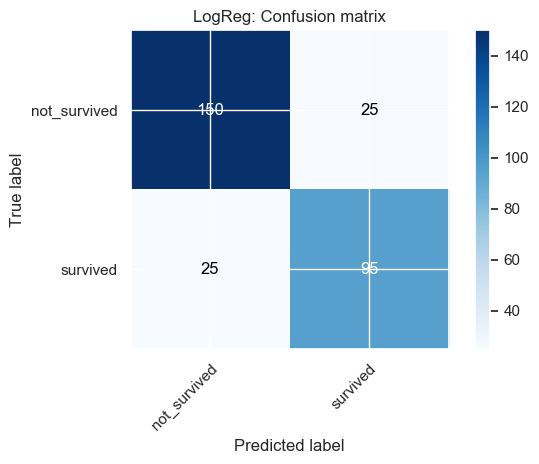

In [350]:
class_names = np.array(['not_survived','survived'])
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title="LogReg: Confusion matrix")
plt.show()

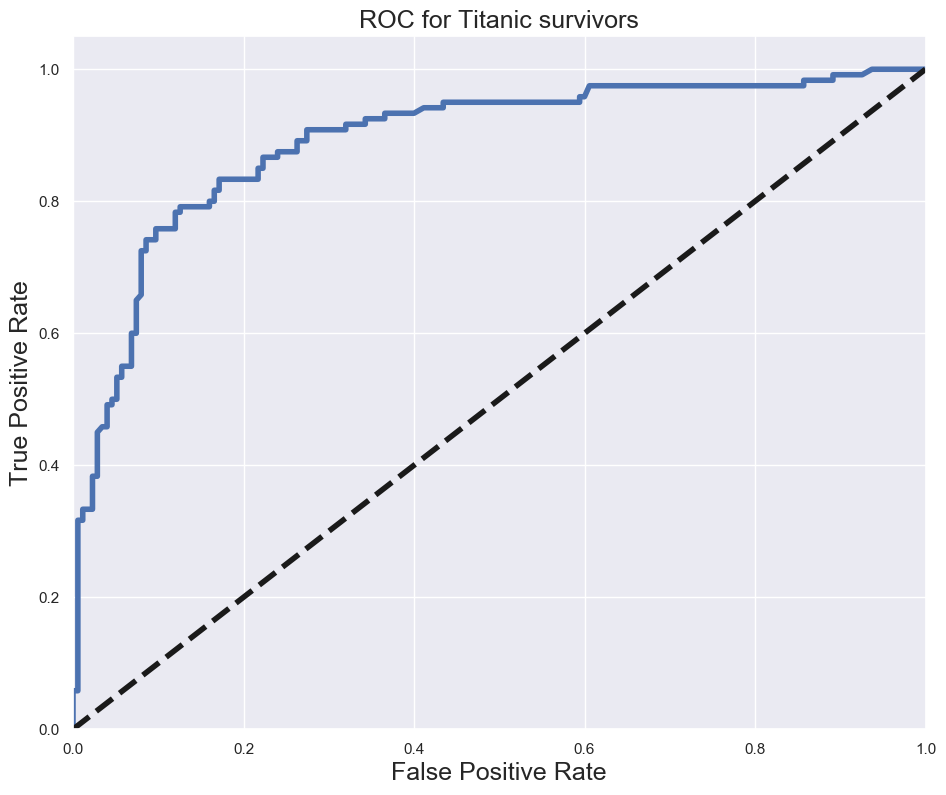

In [351]:
from sklearn.metrics import roc_curve, auc

# plotting ROC to evaluate the model
y_score = logreg.decision_function(X_test)

FPR, TPR, _ = roc_curve(y_test, y_score)
ROC_AUC = auc(FPR, TPR)

plt.figure(figsize =[11,9])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('ROC for Titanic survivors', fontsize= 18)
plt.show()

In [352]:
ROC_AUC

0.8922857142857142

In [353]:
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score

In [354]:
# initalizing and customizing cross validation split
cv = StratifiedShuffleSplit(n_splits = 10, test_size = 0.25, random_state = SEED)
# taking column names aside
column_names = X.columns
# transforming data with standard scaled 
# (note that we did this before for X train and X test separately, but not for the whole set)
X = sc.fit_transform(X)
# calculating accurency
logreg = LogisticRegression(random_state=SEED)
accuracies = cross_val_score(logreg, X, y, cv = cv)
print(round(accuracies.mean(),4))

0.8135


In [355]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# we will search for optimal penalty and C (regularization) value for our LogReg model

C = [0.01, 0.05, 0.1, 0.2, 0.5, 1]
penalties = ['l1', 'l2']
cv = StratifiedShuffleSplit(n_splits = 10, test_size = 0.25)
param = {
    'penalty': penalties,
    'C': C,
}

grid = GridSearchCV(estimator=logreg, param_grid = param, scoring = 'accuracy', n_jobs =-1, cv = cv)
grid.fit(X, y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.25,
            train_size=None),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.1, 0.2, 0.5, 1],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [356]:
# defining a function that will be useful in showing the result of grid search
def display_grid_results():
    print(grid.best_score_)
    print(grid.best_params_)
    print(grid.best_estimator_)

In [357]:
display_grid_results()

0.8322869955156952
{'C': 0.05, 'penalty': 'l2'}
LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [358]:
# defining a function that will fit best parameters and display algorithm's result
def display_score(): 
    best = grid.best_estimator_
    name = grid.estimator.__class__.__name__
    predict = best.score(X,y)
    print(f'{name} scored: {predict}')

In [359]:
display_score()

LogisticRegression scored: 0.8361391694725028


In [360]:
# adding model with best params to the dictionary
best_params = grid.best_params_
name = grid.estimator.__class__.__name__
model = LogisticRegression(**best_params)
models = submit_model(model, name, models)

## K-Nearest Neighbor classifier(KNN)

In [142]:
from sklearn.neighbors import KNeighborsClassifier

In [362]:
# cross-validatgion settings for KNeighborsClassifier
knn = KNeighborsClassifier(metric='minkowski', p=2)
accuracies = cross_val_score(knn, X, y, cv = cv, scoring='accuracy')
print(round(accuracies.mean(),4))

0.7767


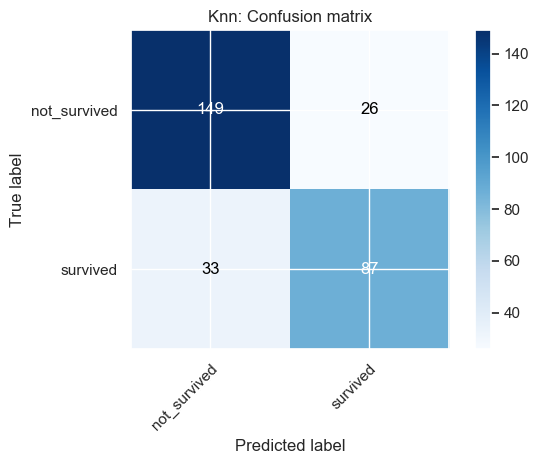

In [363]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title="Knn: Confusion matrix")
plt.show()

In [364]:
# searching for optimal k_range and weights using gridsearch
k_range = range(1,21)
weights_options=['uniform','distance']
param = {
    'n_neighbors': k_range, 
    'weights': weights_options
}
grid = GridSearchCV(estimator=knn, param_grid=param, cv=cv, verbose = False, n_jobs=-1)
grid.fit(X, y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.25,
            train_size=None),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': range(1, 21),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=False)

In [365]:
display_grid_results()

0.8219730941704035
{'n_neighbors': 19, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')


In [366]:
display_score()

KNeighborsClassifier scored: 0.8237934904601572


In [367]:
# adding model with best params to the dictionary
best_params = grid.best_params_
name = grid.estimator.__class__.__name__
model = KNeighborsClassifier(**best_params)
models = submit_model(model, name, models)

## Support Vector Machines(SVM)

In [143]:
from sklearn.svm import SVC

In [369]:
# initializng model
svc = SVC(kernel='rbf', probability=True, random_state=SEED)

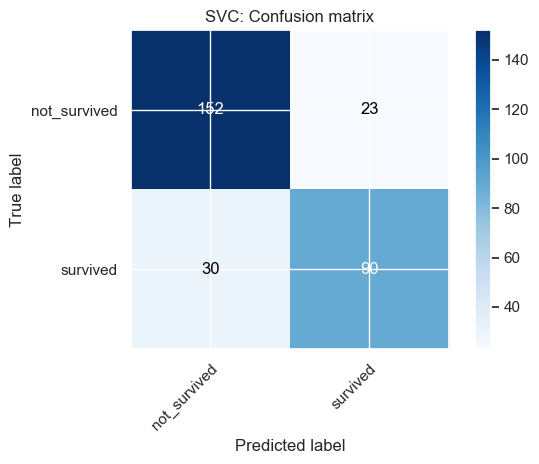

In [370]:
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title="SVC: Confusion matrix")
plt.show()

In [371]:
# searching for optimal C (regularization) and gamma parameters
C = [0.001, 0.01, 0.1, 1, 1.5, 2, 2.5, 3]
gamma = [0.0001,0.001, 0.01, 0.1, 1, 'scale', 'auto']
param = {
    'C': C,
    'gamma': gamma
}
grid = GridSearchCV(estimator=svc, param_grid=param, cv=cv)
grid.fit(X,y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.25,
            train_size=None),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=42, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 1.5, 2, 2.5, 3],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 'scale',
                                   'auto']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [372]:
display_grid_results()

0.8242152466367714
{'C': 1.5, 'gamma': 0.001}
SVC(C=1.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)


In [373]:
display_score()

SVC scored: 0.8271604938271605


In [374]:
# adding model with best params to the dictionary
best_params = grid.best_params_
name = grid.estimator.__class__.__name__
model = SVC(**best_params)
models = submit_model(model, name, models)

## Decision Tree Classifier

In [144]:
from sklearn.tree import DecisionTreeClassifier

In [376]:
# initializng model
tree = DecisionTreeClassifier()

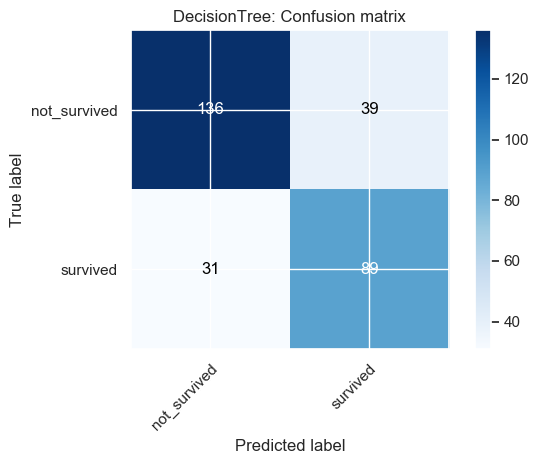

In [377]:
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title="DecisionTree: Confusion matrix")
plt.show()

In [378]:
# searching for max_depth, max_features, criterion using gridsearch
max_depth = range(1, 30)
max_features = ['sqrt', 'log2']
criterion = ['entropy', 'gini']
param = {
    'max_depth': max_depth,
    'max_features': max_features,
    'criterion': criterion
}

grid = GridSearchCV(estimator=tree, param_grid=param, verbose=False, 
                    cv=StratifiedKFold(n_splits=10, random_state=SEED, shuffle=True),
                    n_jobs = -1)

grid.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
         

In [379]:
display_grid_results()

0.8249188514357053
{'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2'}
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [380]:
display_score()

DecisionTreeClassifier scored: 0.8597081930415263


In [381]:
def feature_importance(n=10):
    g = grid.best_estimator_
    feature_importances = pd.DataFrame(g.feature_importances_,
                                   index = column_names,
                                   columns=['importance'])
    return feature_importances.sort_values(by='importance', ascending=False).head(n)

In [382]:
# displaying feature importance for DecissionTree
feature_importance()

,importance
Sex,0.233061
Cabin_M,0.140788
Title_Mrs,0.138225
Age,0.060337
Fare per Member,0.057253
SibSp,0.053610
Family Group_large family,0.048393
Cabin_D,0.040348
Title_Other,0.034550
Pclass,0.033839


In [383]:
# adding model with best params to the dictionary
best_params = grid.best_params_
name = grid.estimator.__class__.__name__
model = DecisionTreeClassifier(**best_params)
models = submit_model(model, name, models)

## Random Forest Classifier

In [145]:
from sklearn.ensemble import RandomForestClassifier

In [385]:
# initializng model
forest = RandomForestClassifier(random_state=SEED)

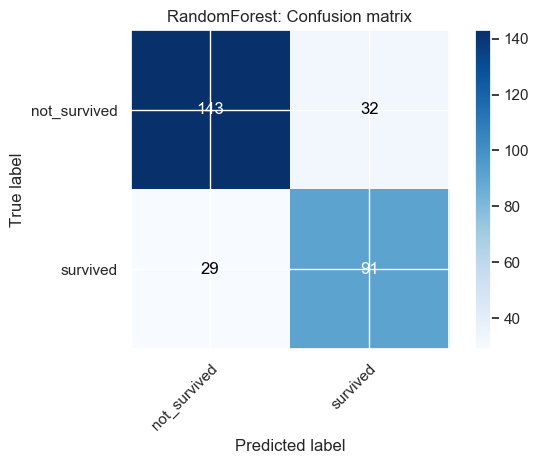

In [386]:
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title="RandomForest: Confusion matrix")
plt.show()

In [387]:
# searching for max_depth, max_features, n_estimators, min_samples_split, min_samples_leaf and bootsrap using gridsearch
parameter_grid = {
                 'max_depth' : [1, 2, 4, 6, 8, 10],
                 'n_estimators': [30, 60, 150, 300, 500, 1000],
                 'max_features': ['sqrt', 'log2'],
                 'min_samples_split': [2, 3, 5, 7],
                 'min_samples_leaf': [1, 3, 5],
                 'bootstrap': [True, False],
                 }

# changing cross-validation procedure
cv = StratifiedKFold(n_splits=10, random_state=SEED, shuffle=True)

grid = GridSearchCV(estimator=forest, verbose=1, param_grid=parameter_grid, cv=cv, n_jobs = -1)
grid.fit(X,y)

Fitting 10 folds for each of 1728 candidates, totalling 17280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 220 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done 470 tasks      | elapsed:   58.1s
[Parallel(n_jobs=-1)]: Done 820 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1270 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1820 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 2470 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 3220 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 4070 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 5020 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 6070 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 7220 tasks      | elapsed: 18.4min
[Parallel(n_jobs=-1)]: Done 8470 tasks      | elapsed: 21.9min
[Parallel(n_jobs=-1)]: Done 9820 tasks      | elapsed: 24.4min
[Parallel(n_jobs=-1)]: Done 11270 tasks      |

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              mi...
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_st

In [388]:
display_grid_results()

0.8428464419475656
{'bootstrap': True, 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 30}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


In [389]:
display_score()

RandomForestClassifier scored: 0.8698092031425365


In [390]:
# displaying feature importance for RandomForest
feature_importance()

,importance
Title_Mr,0.210939
Sex,0.147592
Fare per Member,0.080232
Fare,0.073249
Title_Miss,0.063500
Pclass,0.049315
Cabin_M,0.046123
Title_Mrs,0.045891
Age,0.042762
Family Group_small family,0.034954


In [391]:
# adding model with best params to the dictionary
best_params = grid.best_params_
name = grid.estimator.__class__.__name__
model = RandomForestClassifier(**best_params)
models = submit_model(model, name, models)

# Gradient Boosting Classifier

In [146]:
from sklearn.ensemble import GradientBoostingClassifier

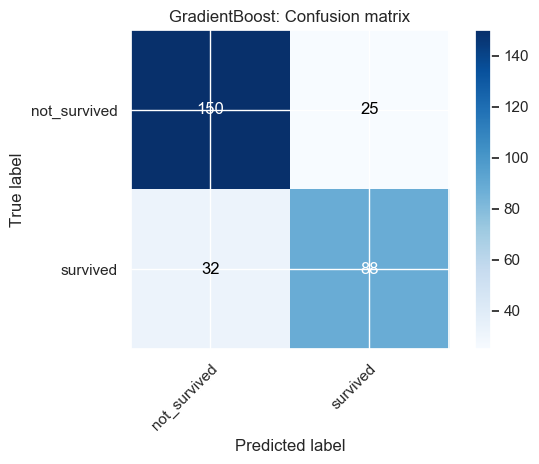

In [393]:
gradient_boost = GradientBoostingClassifier(random_state=SEED)
gradient_boost.fit(X_train, y_train)
y_pred = gradient_boost.predict(X_test)
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title="GradientBoost: Confusion matrix")
plt.show()

In [395]:
# searching for max_depth, max_features, n_estimators, min_samples_split, min_samples_leaf and bootsrap using gridsearch
parameter_grid = {
                 'max_depth' : [3, 5, 7, 9, 11, 13],
                 'n_estimators': [10, 20, 60, 100, 300],
                 'max_features': ['sqrt', 'log2'],
                 'min_samples_split': [2, 3, 5, 7, 9, 11],
                 'min_samples_leaf': [1, 2, 3, 5, 7],
                 }

grid = GridSearchCV(estimator=gradient_boost, verbose=1, param_grid=parameter_grid, cv=cv, n_jobs = -1)
grid.fit(X,y)

Fitting 10 folds for each of 1800 candidates, totalling 18000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 728 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 1728 tasks      | elapsed:   36.3s
[Parallel(n_jobs=-1)]: Done 3128 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 4928 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 6552 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 7852 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 9204 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 10532 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 11964 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 13192 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 14624 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 16248 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 18000 out of 18000 | elapsed: 17.7min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  m...
                                                  subsample=1.0, tol=0.0001,
                           

In [396]:
display_grid_results()

0.8405742821473158
{'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 9, 'n_estimators': 10}
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=9,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=3, min_samples_split=9,
                           min_weight_fraction_leaf=0.0, n_estimators=10,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [397]:
display_score()

GradientBoostingClassifier scored: 0.9012345679012346


In [398]:
# displaying feature importance for GradienBoost
feature_importance()

,importance
Title_Mr,0.209881
Sex,0.184990
Fare per Member,0.102720
Age,0.061763
Family Size,0.060764
Title_Miss,0.059268
Pclass,0.056383
Fare,0.050933
Cabin_M,0.035444
Fare Group_low,0.023710


In [399]:
# adding model with best params to the dictionary
best_params = grid.best_params_
name = grid.estimator.__class__.__name__
model = GradientBoostingClassifier(**best_params)
models = submit_model(model, name, models)

# XGBClassifier

In [147]:
from xgboost import XGBClassifier

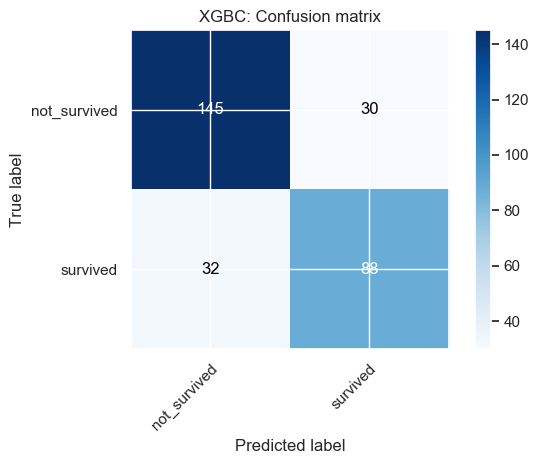

In [402]:
xgbc = XGBClassifier(objective = 'binary:logistic')
xgbc.fit(X_train, y_train)
y_pred = xgbc.predict(X_test)
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title="XGBC: Confusion matrix")
plt.show()

In [403]:
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV

params = {'n_estimators': stats.randint(150, 500),
              'learning_rate': stats.uniform(0.01, 0.07),
              'subsample': stats.uniform(0.3, 0.7),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.45),
              'min_child_weight': [1, 2, 3]}

clf = RandomizedSearchCV(xgbc, param_distributions=params, n_iter=25, 
                         scoring ='f1', error_score=0, verbose=3, n_jobs=-1)
clf.fit(X,y)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   24.4s finished


RandomizedSearchCV(cv=None, error_score=0,
                   estimator=XGBClassifier(base_score=0.5, booster=None,
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B71B314340>,
                                        'max_de

In [404]:
print(clf.best_score_)
print(clf.best_params_)
print(clf.best_estimator_)

0.7773071741908743
{'colsample_bytree': 0.7082856832738467, 'learning_rate': 0.06448897393466688, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 476, 'subsample': 0.5374852679619463}
XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7082856832738467, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints=None,
              learning_rate=0.06448897393466688, max_delta_step=0, max_depth=4,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=476, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.5374852679619463,
              tree_method=None, validate_parameters=False, verbosity=None)


In [405]:
best = clf.best_estimator_
name = clf.estimator.__class__.__name__
predict = best.score(X,y)
print(f'{name} scored: {predict}')

XGBClassifier scored: 0.9057239057239057


In [406]:
# adding model with best params to the dictionary
best_params = clf.best_params_
model =  XGBClassifier(**best_params)
models = submit_model(model, name, models)

# Extra Trees Classifier

In [148]:
from sklearn.ensemble import ExtraTreesClassifier
extree = ExtraTreesClassifier(random_state=SEED)

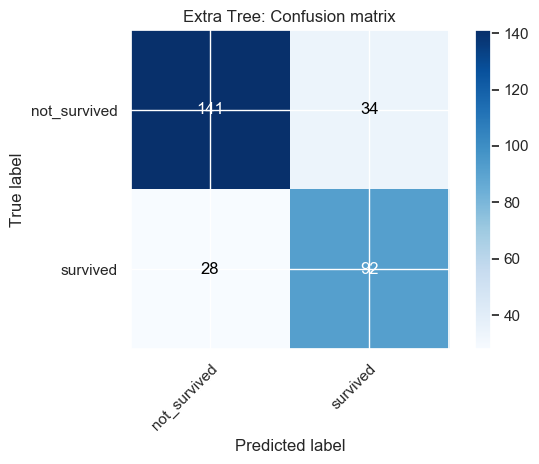

In [408]:
extree.fit(X_train, y_train)
y_pred = extree.predict(X_test)
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title="Extra Tree: Confusion matrix")
plt.show()

In [409]:
parameter_grid = {
                 'max_depth' : [3, 4, 5, 7, 9, 11],
                 'n_estimators': [10, 20, 60, 100, 200],
                 'max_features': ['sqrt', 'log2', 8, 9],
                 'min_samples_split': [2, 3, 5, 7],
                 'min_samples_leaf': [2, 3, 5, 7],
                 }

grid = GridSearchCV(estimator=extree, verbose=1, param_grid=parameter_grid, cv=cv, n_jobs = -1)
grid.fit(X,y)

Fitting 10 folds for each of 1920 candidates, totalling 19200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 692 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 1500 tasks      | elapsed:   42.7s
[Parallel(n_jobs=-1)]: Done 2200 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3100 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 4200 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 5500 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 7000 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 8700 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 10600 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 12700 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 15000 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 17500 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 19200 out of 19200 | elapsed:  9.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min...
                                            n_estimators=100, n_jobs=None,
                                            oob_score=False, random_state=42,
                                            verbose=0, 

In [410]:
display_grid_results()

0.8417103620474407
{'max_depth': 7, 'max_features': 9, 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 10}
ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=7, max_features=9,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=2, min_samples_split=7,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=42, verbose=0,
                     warm_start=False)


In [411]:
display_score()

ExtraTreesClassifier scored: 0.8664421997755332


In [412]:
# displaying feature importance for Extra Tree Classifier
feature_importance()

,importance
Sex,0.245925
Title_Mr,0.174063
Title_Miss,0.088113
Pclass,0.057237
Family Group_small family,0.056170
Title_Mrs,0.052047
Cabin_M,0.051233
Fare Group_low,0.031812
Title_Other,0.026041
Fare,0.024327


In [413]:
# adding model with best params to the dictionary
best_params = grid.best_params_
name = grid.estimator.__class__.__name__
model = ExtraTreesClassifier(**best_params)
models = submit_model(model, name, models)

# 6. Final prediction & submission

In [149]:
# function that helps processing data in training and test dataframes for the final prediction
def process_dataframes(df_train, df_test, headers):
    df_train = df_train.drop(['Survived'], axis=1)
    # transforming features in both data frames
    df_train = sc.transform(df_train)
    df_test = sc.transform(df_test)
    # assigning transformed features to new data frames
    train_f = pd.DataFrame(df_train, columns=headers)
    test_f = pd.DataFrame(df_test, columns=headers)
    return train_f, test_f

In [150]:
train_f, test_f = process_dataframes(df_train, df_test, headers)

In [151]:
# function that creates submission dataframe 
def creating_sub_df(model, test_f):
    result = model.predict(test_f).astype(int)
    df_results = pd.DataFrame()
    df_test = load_titanic_data("test.csv")
    df_results['PassengerId'] = df_test['PassengerId']
    df_results['Survived'] = result
    return df_results

In [152]:
import datetime
# helper function that creates submission file based on user variable and dataframe with final predictions
def generate_sub_file(df_results, user, algo):
    today = datetime.datetime.now()
    filename = f"{user}_{algo}_{today.year}-{today.month}-{today.day}_{today.hour}-{today.minute}"
    df_results[['PassengerId', 'Survived']].to_csv(f"{filename}.csv", index=False)
    print(f'Files saved successfuly as {filename}')

In [421]:
# function that will create submission files for all models collected in the submission dictionary
def multiple_subs(models, train_f, test_f, targets, user):
    models = models.items()
    for name, model in models:
        model.fit(train_f, targets)
        df_results = creating_sub_df(model, test_f)
        generate_sub_file(df_results, user, name)

In [422]:
multiple_subs(models, train_f, test_f, targets, 'bogusz')

Files saved successfuly as bogusz_LogisticRegression_2020-3-16_18-14
Files saved successfuly as bogusz_KNeighborsClassifier_2020-3-16_18-14
Files saved successfuly as bogusz_SVC_2020-3-16_18-14
Files saved successfuly as bogusz_DecisionTreeClassifier_2020-3-16_18-14
Files saved successfuly as bogusz_RandomForestClassifier_2020-3-16_18-14
Files saved successfuly as bogusz_GradientBoostingClassifier_2020-3-16_18-14
Files saved successfuly as bogusz_XGBClassifier_2020-3-16_18-14
Files saved successfuly as bogusz_ExtraTreesClassifier_2020-3-16_18-14


In [192]:
# function that will help you with submitting just one model. Useful for tunning hyperparametrs to the best performing model
def single_sub(model, train_f, test_f, targets, user, algo):
    model.fit(train_f, targets)
    df_results = creating_sub_df(model, test_f)
    generate_sub_file(df_results, user, algo)

For my final submission, I have used RandomForestClassifier, which was performing best among other models in cross-validation tests. The model which was tunned by GridSearch should allow you to score around ~0.79 since, the most relevant work was done in the feature engineering part, although, you can still boost this model a bit by playing with hyperparameters, as I did. Have fun, and thank you for reading, if you came this far!